# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Работа-с-пропущенными-значениями" data-toc-modified-id="Работа-с-пропущенными-значениями-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Работа с пропущенными значениями</a></span></li><li><span><a href="#Приведение-типов-данных" data-toc-modified-id="Приведение-типов-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Приведение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Цена-квадратного-метра" data-toc-modified-id="Цена-квадратного-метра-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Цена квадратного метра</a></span></li><li><span><a href="#День-недели,-месяц-и-год-публикации-объявления" data-toc-modified-id="День-недели,-месяц-и-год-публикации-объявления-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>День недели, месяц и год публикации объявления</a></span></li><li><span><a href="#Категории-этажей" data-toc-modified-id="Категории-этажей-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Категории этажей</a></span></li><li><span><a href="#Соотношения-площадей" data-toc-modified-id="Соотношения-площадей-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>Соотношения площадей</a></span></li><li><span><a href="#Санкт-Петербург" data-toc-modified-id="Санкт-Петербург-5.0.5"><span class="toc-item-num">5.0.5&nbsp;&nbsp;</span>Санкт-Петербург</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-параметров" data-toc-modified-id="Исследование-параметров-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Исследование параметров</a></span><ul class="toc-item"><li><span><a href="#Площадь-квартиры" data-toc-modified-id="Площадь-квартиры-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Площадь квартиры</a></span></li><li><span><a href="#Цена-квартиры" data-toc-modified-id="Цена-квартиры-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Цена квартиры</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Время-размещения" data-toc-modified-id="Время-размещения-6.1.5"><span class="toc-item-num">6.1.5&nbsp;&nbsp;</span>Время размещения</a></span></li></ul></li><li><span><a href="#Исключение-редких-и-выбивающихся-значений" data-toc-modified-id="Исключение-редких-и-выбивающихся-значений-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Исключение редких и выбивающихся значений</a></span></li><li><span><a href="#Зависимость-стоимости-квартиры-от-других-факторов" data-toc-modified-id="Зависимость-стоимости-квартиры-от-других-факторов-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Зависимость стоимости квартиры от других факторов</a></span><ul class="toc-item"><li><span><a href="#Площадь-квартиры" data-toc-modified-id="Площадь-квартиры-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Площадь квартиры</a></span></li><li><span><a href="#Число-комнат-и-этаж" data-toc-modified-id="Число-комнат-и-этаж-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Число комнат и этаж</a></span></li><li><span><a href="#Удалённость-от-центра" data-toc-modified-id="Удалённость-от-центра-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Удалённость от центра</a></span></li><li><span><a href="#Дата-публикации" data-toc-modified-id="Дата-публикации-6.3.4"><span class="toc-item-num">6.3.4&nbsp;&nbsp;</span>Дата публикации</a></span></li></ul></li><li><span><a href="#Населённые-пункты-с-наибольшим-числом-объявлений" data-toc-modified-id="Населённые-пункты-с-наибольшим-числом-объявлений-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Населённые пункты с наибольшим числом объявлений</a></span></li><li><span><a href="#Анализ-объвлений-для-центра-Санкт-Петербурга" data-toc-modified-id="Анализ-объвлений-для-центра-Санкт-Петербурга-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Анализ объвлений для центра Санкт-Петербурга</a></span><ul class="toc-item"><li><span><a href="#Определение-области,-входящей-в-центр" data-toc-modified-id="Определение-области,-входящей-в-центр-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Определение области, входящей в центр</a></span></li><li><span><a href="#Анализ-объявлений" data-toc-modified-id="Анализ-объявлений-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Анализ объявлений</a></span><ul class="toc-item"><li><span><a href="#Площадь" data-toc-modified-id="Площадь-6.5.2.1"><span class="toc-item-num">6.5.2.1&nbsp;&nbsp;</span>Площадь</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-6.5.2.2"><span class="toc-item-num">6.5.2.2&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Удалённость-от-центра" data-toc-modified-id="Удалённость-от-центра-6.5.2.3"><span class="toc-item-num">6.5.2.3&nbsp;&nbsp;</span>Удалённость от центра</a></span></li><li><span><a href="#Количество-комнат-и-этаж" data-toc-modified-id="Количество-комнат-и-этаж-6.5.2.4"><span class="toc-item-num">6.5.2.4&nbsp;&nbsp;</span>Количество комнат и этаж</a></span></li><li><span><a href="#Дата-публикации-" data-toc-modified-id="Дата-публикации--6.5.2.5"><span class="toc-item-num">6.5.2.5&nbsp;&nbsp;</span>Дата публикации <a id="center_date_analysis" rel="nofollow"></a></a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Подключение библиотек

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter

DATE_FORMAT = '%Y-%m-%dT%H:%M:%S'

# при выводе датафрейма будем показывать все колонки
pd.set_option('display.max_columns', None)
# зададим некоторые параметры по умолчанию для графиков 
plt.rcParams.update({
    'axes.titlesize': 14,
    'figure.figsize': (12, 7)})

import warnings
warnings.filterwarnings("ignore")

## Изучение данных из файла

In [2]:
df = pd.read_csv('../datasets/real_estate_data.csv', sep='\t')

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Сгенерируем описатльную статистику

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Видим, что некоторые столбцы имеют неподходящий тип данных. Так, многие столбцы вещественного типа, хотя хранят целочисленные значения. Большое количество пропусков в столбцах `is_apartment`, `parks_nearest`, `ponds_nearest` - больше половины значений. Есть также другие столбцы, где доля пропусков велика.
Из минимальных и максимальных значений `ceiling_height` можно сделать вывод, что в столбце есть выбросы. 1 метр - маловато, 100 метров - многовато для высоты потолка
Также есть квартиры с количеством комнат 0, возможно, это квартиры - студии

Количество пропусков в картографичеких данных практически везде одинаково, поскольку они получены автоматически, то алгоритм определения мог не везде отработать или же эти данные были просто сгенерированы не для всех адресов. Можно заметить, что пропусков для расстояний до ближайшей парковки `parks_nearest` и водоёма `ponds_nearest` больше чем для соответсвующих им значений количества таких объектов `parks_around3000` и `ponds_around3000`. Это скорее всего связано с тем, что для объектов, удалённых более, чем на 3 км, такое расстояние не определялось, проверим позже.

## Предобработка данных

### Обработка дубликатов 

In [4]:
print('Количество явных дублей: ', df.duplicated().sum())

Количество явных дублей:  0


Явных дублей нет. Посмотрим на неявные в текстовом столбце. Выведем только часть значений 

In [5]:
print('Количество уникальных локаций:', len(df.locality_name.unique()))
df.locality_name.unique()[:20]

Количество уникальных локаций: 365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино'], dtype=object)

У группы Марлины есть песня "Воин буквы Ё". Я, как и автор песни, "за букву Ё, всюду вставляю её". Но для обработки дубликатов в названиях посёлков, заменим `Ё` на `Е`.

In [6]:
df.locality_name = df.locality_name.str.replace('ё', 'е')
print('Количество уникальных локаций:', len(df.locality_name.unique()))

Количество уникальных локаций: 331


После беглого просмотра уникальных значений названий посёлков можно прийти к выводу, что неявных дублей, вызванных разным написанием названия одного и того же населённого пункта - нет. К тому же исключительно по названиям населённых пунктов сложно определить дубли это или нет, поскольку сёла/посёлки/деревни могут иметь одинаковые имена, необходимо опираться на географические данные. 

### Работа с пропущенными значениями

Посмотрим, есть ли пропуски в названиях населённых пунктов

In [7]:
df.locality_name.isna().sum()
df = df.dropna(subset=['locality_name'])

Немного, можно удалить. Однако наличие этих пропусков не помешает ответить на поставленные вопросы. По возможности не будем удалять данные. Для анализа можно будет по месту применить фильтр в случае необходимости

В картографических данных много пропусков, посмотрим сколько известных значений расстояний до ближайшего аэропорта и до центра Санкт-Петербурга в самом Санкт-Петербурге и в остальных населённых пунктах (условно назовём их "пригородом"). Общее количество будем рассчитывать на основе колонки, в которой нет пропусков, например `first_day_exposition`. Заодно посмотрим сколько значений количества парковок вблизи указано.

In [8]:
for col in ['cityCenters_nearest', 'airports_nearest', 'parks_around3000']:
    print('Записей', col, 'для Санкт-Петербурга:', 
        df[(df.locality_name == 'Санкт-Петербург')][col].count(), 'из',
        df[(df.locality_name == 'Санкт-Петербург')].first_day_exposition.count()
    )
    print('Записей', col, 'для пригорода:', 
        df[(df.locality_name != 'Санкт-Петербург')][col].count(), 'из',
        df[(df.locality_name != 'Санкт-Петербург')].first_day_exposition.count()
    )

Записей cityCenters_nearest для Санкт-Петербурга: 15660 из 15721
Записей cityCenters_nearest для пригорода: 2479 из 7929
Записей airports_nearest для Санкт-Петербурга: 15636 из 15721
Записей airports_nearest для пригорода: 2480 из 7929
Записей parks_around3000 для Санкт-Петербурга: 15660 из 15721
Записей parks_around3000 для пригорода: 2480 из 7929


В Питере совсем небольшая доля картографических данных отсутсвует, для анализа в дальнейшем это не критично
Для пригорода уже ситуация иная - около 30 процентов таких данных для пригорода неизвестно. 
Поскольку картографические данные были получены автоматически, то скорее всего, алгоритм не отработал, вероятно по причине невозможности одназначно определить адрес.
Пропуски в таких данных невозможно корректно заполнить на основе лишь имеющихся данных. Возможно для небольших населённых пунктов можно было бы вычислить средние расстояния с помощью API Яндекс карт (например yandex-maps) или других. Однако, во-первых - мы не знаем точного правила определения расстояния в данных, переданных нам, во-вторых такой способ даст большое число неточностей.

В реальных даннах о продажах квартир должен иметься адрес, поэтому самый правильный способ устранить пропуски - запросить данные. Мы можем рассчитать средние значения для пригорода, полагая, что такие населённые пункты не велики, на основе известных значений. Для Санкт-Петербурга этого проделать не получится, поскольку, он велик, как Пётр =)    

In [9]:
# заполнать будем расстояния до центра и аэропорта 
for col in ['cityCenters_nearest', 'airports_nearest']:
    # отфильтровываем квартиры пригорода, для которых расстояние известно, группируем по населённому пункту
    # рассчитываем среднее, поллучим pd.Series со средними расстояними по каждому населённому пункту
    col_mean = df[(df.locality_name != 'Санкт-Петербург') & ~df[col].isna()].groupby('locality_name')[col].mean()
    # присваиваем расстояние col_mean для населённых пунктов, для которых вычислилось среднее 
    df.loc[df[col].isna(), col] = df['locality_name'].map(col_mean)
    # смотрим, как изменилось количество известных расстояний
    print('Записей', col, df[(df.locality_name != 'Санкт-Петербург')][col].count())

Записей cityCenters_nearest 3065
Записей airports_nearest 3065


Примерно для 500 квартир добавили значения `cityCenters_nearest`, `airports_nearest`. На самом деле это совсем немного, можно было этого и не делать.

Проверим ещё кое-что по картографическим данным

In [10]:
print('Совпадают ли пропуски в данных о количестве ближайших парковок и водоёмов:', 
    df[df.parks_around3000.isna()].equals(df[df.ponds_around3000.isna()]))
print('Записей о ближайших парковках:') 
print('Для нулевых parks_around3000:', df[df.parks_around3000 == 0].parks_nearest.count())
print('Для ненулевых parks_around3000:', df[df.parks_around3000 != 0].parks_nearest.count())

Совпадают ли пропуски в данных о количестве ближайших парковок и водоёмов: True
Записей о ближайших парковках:
Для нулевых parks_around3000: 4
Для ненулевых parks_around3000: 8060


Всего 4 значения не NaN для `parks_nearest` при укзанном количестве парковок = 0. Ограничим в фильтре расстояние. 

In [11]:
df[(df.parks_around3000 == 0) & (df.parks_nearest < 3000)].parks_nearest.mean()

nan

Понятно, что пропуски в `parks_nearest` соответсвуют `parks_around3000 = 0`. Это не проблема, поскольку просто означает, что расстояние больше 3 км (кроме случаев когда и  `parks_around3000 = NaN`. Аналогично для `ponds_around3000`.

Пропущенные значения числа балконов заменим на 0. Если оно не указано  — скорее всего, балконов нет

In [12]:
df.balcony = df.balcony.fillna(0)

Посмотрим на значения в столбце `is_apartment`. Это флаг, является ли квартира апартаментами. Сейчас имеет тип `object`. Должен быть булев

In [13]:
list(df.is_apartment.unique())

[nan, False, True]

`pandas` определил тип столбца `is_apartment` как `object` из-за наличия в нём NaN. Не будем явно преобразовывать тип в булев, поскольку применение `.astype('bool')` превратит все пропуски в `False`. Однако наличие пропуска не означает, что квартира не является апартаментами. Апартаменты - форма собственности, которая имеет некоторые принципиальные отличия от жилой недвижимости, возможно, человек намеренно не указал эти данные, или посчитал, что указывать не нужно, поскольку его собственность не апартаменты.

В остальных столбцах не удастся найти подходящего способа заполнения пропусков. У нас нет информации на основании, которой мы бы могли заполнить высоту потолков, жилую площадь, площадь кухни, эти параметры разные для квартир даже в одном доме, районе. Наличие пропусков может бытиь обусловлено просто тем, что человек не посчитал нужным их указывать. 

Время размещения мы также не можем заполнить. Тут пропуски могут быть обусловлены тем, что объявление так и не было снято с продажи. 

Будем работать с тем, что есть.

### Приведение типов данных

Нет смысла хранить данные о цене, расстояниях количествах этажей, балконов, парковок, водоёмов, дней размещения в вещественном формате, разумнее использовать целочисленный. В вещественном формате в таблице указаны только площади, их тип заменять не будем. 
Особенность типа данных `int` - он не может хранить `NaN`, однако реализованный в `pandas 1.0.0` тип `Int` - может. _Но мы не будем приводить к нему. Не все методы работают с ним адекватно =(_

Для некоторых целочисленных данных можно немного сократить количество используемой памяти. Так, количество фотографий, комнат, номера этажа очевидно поместятся в `int16`. Но на этом датасете выигрыш небольшой. 

Поэтому столбцы с пропусками оставим типа `float`, просто округлим, чтобы отбросить хвосты и иметь возможность применять операцию сравнения с целыми числами и `NaN`. Столбцы без пропусков приведём к `int` там, где по смыслу целочисленные значения.

- Проведём округления `floors_total`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000`, `days_exposition` 
- Заменим тип `total_images`, `rooms`, `floor`, `balcony` на `int16` 
- Заменим тип `last_price` на `int`
- Тип данных `first_day_exposition` заменим на `datetime64` используя метод `to_datetime()`

In [14]:
for col in ['floors_total','balcony','airports_nearest',
            'cityCenters_nearest','parks_nearest','ponds_nearest',
            'parks_around3000','ponds_around3000','days_exposition']:
    df[col] = df[col].round()
for col in ['total_images','rooms','floor']: 
    df[col] = df[col].round().astype('int16')
df['last_price'] = df['last_price'].round().astype('int')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format=DATE_FORMAT)
# посмотрим, что получилось 
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int16         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int16         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int16         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Расчёты и добавление результатов в таблицу

#### Цена квадратного метра

Рассчитаем на основе значений `last_price` и `total_area`. Добавим столбец `m2_cost`. Сразу преобразуем в целочисленный формат

In [15]:
df['m2_cost'] = (df['last_price'] / df['total_area']).round().astype('int')

#### День недели, месяц и год публикации объявления

Рассчитаем на основе значений `first_day_exposition`. Добавим соответсвенно столбцы `weekday`, `month`, `year`.

In [16]:
df['weekday'] = df['first_day_exposition'].dt.weekday.astype('int8')
df['month'] = df['first_day_exposition'].dt.month.astype('int8')
df['year'] = df['first_day_exposition'].dt.year.astype('int16')

#### Категории этажей

Рассчитаем на основе значений `floor` и `floors_total`. Добавим столбец `floor_category`.
Напишем функцию для отнесения этажа к категориям  `первый`, `последний`, `другой`. Если значения этажа `floor = 1`, то этаж будет первым, если значение этажа совпадает с общим количеством этажей, то последним, в остальных случаях другим

In [17]:
df['floor_category'] = df.apply(lambda row: 
    'первый' if row['floor'] == 1 
    else 'последний' if row['floor']==row['floors_total']
    else 'другой', axis=1)

#### Соотношения площадей

На основе значений `living_area` и `total_area` рассчитаем значение соотношения жилой и общей площади - `living_to_total`,

На основе значений `kitchen_area` и `total_area` рассчитаем значение соотношения площади кухни к общей - `kitchen_to_total`

In [18]:
df['living_to_total'] = (df['living_area'] / df['total_area']).round(2)
df['kitchen_to_total'] = (df['kitchen_area'] / df['total_area']).round(2)

Датасет готов для проведения анализа. Для полей в которых есть NaN'ы при необходимости применим фильтр

#### Санкт-Петербург

Добавим флаг принадлежности квартиры к городу Санкт-Петербург

In [19]:
df['locality_is_spb'] = df['locality_name'] == 'Санкт-Петербург'

# посмотрим, что получилось 
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int16         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int16         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int16         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_cost,weekday,month,year,floor_category,living_to_total,kitchen_to_total,locality_is_spb
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,0.47,0.23,True
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82921,1,12,2018,первый,0.46,0.27,False
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786,3,8,2015,другой,0.61,0.15,True
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,NaN,NaN,True
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,0.32,0.41,True


## Исследовательский анализ данных

### Исследование параметров

Для начала посмотрим на гистограммы, диаграммы размаха параметров: площадь, цена, число комнат, высота потолков.

Также посмотрим на матрицу рассеяния для всех этих параметров

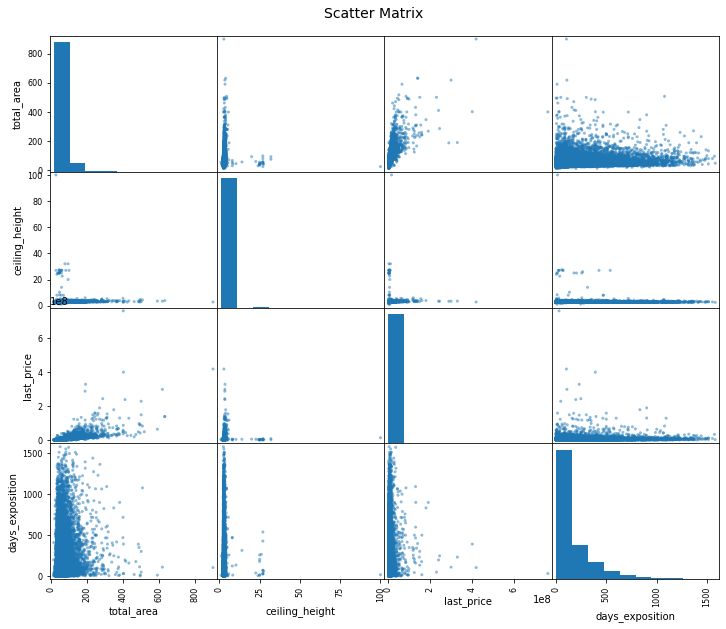

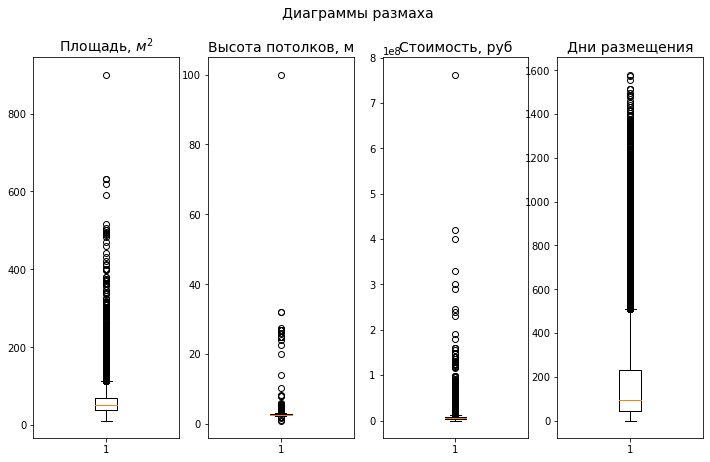

In [20]:
def show_scatter_matrix(df, cols, figsize=(12,10), title='Scatter Matrix'):
    '''
    Строит матрицу рассеяния для колонок cols из датасета df 
    '''
    # строим матрицу рассеяния 
    pd.plotting.scatter_matrix(df[cols], figsize=figsize);
    # указываем заголовок
    plt.suptitle(title, fontsize=14, y=0.92)

def show_boxplots(df, cols, title='Диаграммы размаха', col_titles=None):
    '''
    Диаграммы размаха для колонок cols из датасета df
    '''
    if col_titles is None or len(col_titles)<len(cols):
        col_titles = cols
    # строим диаграммы размаха
    # инициализируем фигуру для диаграмм размаха, задаём для каждого столбца из списка свой subplot
    _, axes = plt.subplots(1, len(cols), figsize=(12,7))
    for i, ax in enumerate(axes.flat): # flat - метод numpy, преобразует в одномерный массив
        ax.boxplot( df[df[cols[i]].notna()][cols[i]] ) # строим диаграмму размаха, отфильтровав пропуски 
        ax.set_title(col_titles[i], fontsize=14) # заголовок
        ax.tick_params(axis='y', labelsize=10)
        plt.suptitle(title, fontsize=14)
    plt.show(); #tight_layout()

show_scatter_matrix(df, ['total_area','ceiling_height','last_price','days_exposition'])

show_boxplots(df, ['total_area','ceiling_height','last_price','days_exposition'],
              col_titles=['Площадь, $м^2$','Высота потолков, м','Стоимость, руб','Дни размещения'])

Посмотрим как меняются медианные значения высоты цены, площади, высоты потолков для комнат. 

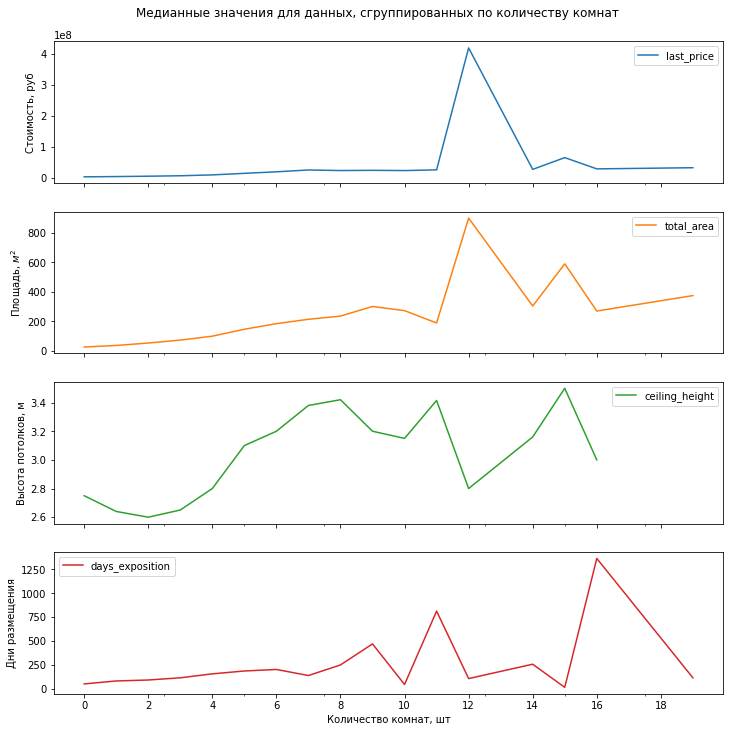

In [21]:
# формируем таблицу с медианными значениями, зразу применяем plot()
ax = (df[['rooms','last_price','total_area','ceiling_height','days_exposition']]
      .groupby('rooms').agg('median').plot(subplots=True, figsize=(12,12)))
# настраиваем отображение графиков
plt.xticks([i for i in range(0,20,2)])
plt.xlabel('Количество комнат, шт')
plt.suptitle('Медианные значения для данных, сгруппированных по количеству комнат', y=0.92)
ax[0].set(ylabel='Стоимость, руб')
ax[1].set(ylabel='Площадь, $м^2$')
ax[2].set(ylabel='Высота потолков, м')
ax[3].set(ylabel='Дни размещения');

До количества комнат равного 8 все параметры меняются плавно. Далее заметны сильно выбивающиеся значения. Для таких квартир слишком мало значений, выборки по ним нерепрезентативны

Посмотрим ещё раз на описательную статистику, теперь только для этих параметров

In [22]:
df[['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.000000,2.365000e+04,23650.000000,14490.000000
mean,60.329069,6.541127e+06,2.070106,2.771287
std,35.661808,1.089640e+07,1.078620,1.261593
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.700000,6.799000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


Видим, что распределения всех параметров сильно смещены влево, особенно цены и высоты потолков. Диаграммы размаха при наличии выбросов совсем не наглядны, боксы сплющены, невозможно из графика даже оценить медиану.

Логично предположить что нетипичные, слишком большие, значения для площади, количества комнат и цены могут относиться к одним и тем же квартирам. Но также возможны ошибки в данных. Судя по матрице рассеяния встречаются квартиры с небольшим количесвом комнат, но очень большой площадью или ценой. Или это уникальные экземпляры, или ошибки в данных.

Более вытянутый хвост у распределения цен обусловлен тем, что для элитного жилья цена растёт непропорционально по отношению к параметрам квартиры. Такое жильё очевидно неинтересно для нашего анализа, поскольку нехарактерно для всей выборки и скорее всего процент таких квартир во всём датасете мал. 

Для высоты потолков выделяются значения от 20 до 35 метров, скорее всего здесь ошибки в единицах измерений

Из описательной статистики видим, что средние и медианные значения для количества комнат практически одинаковы, то же самое для высоты потолков. Значит, в этих столбцах число нетипично больших значений невелико. В значениях жилой площади и цены эта разница уже ощутимее.

Разберёмся с выбросами для каждого параметра по отдельности.
Прежде напишем функцию для одновременного отображения диаграммы размаха и гистограммы для заданного параметра

In [23]:
def show_boxplot_and_hist(col, bins = 100, 
    title='Распределение значений', 
    xlabel=None, ylabel='Количество значений, шт',
    xformat=['.d',1e0], yformat=['.d',1e0]
):
    '''
    Функция построения гистограммы и диаграммы размаха для столбца col
    bins задаёт число корзин для гистограммы, по умолчанию 100
    title - задаёт название графика
    xlabel, ylabel - подписи к осям
    xformat, yformat - форматы вывода чисел на осях, передаются в виде списка: 
        xformat[0] - str - формат вывода чисел,
        xformat[1] - float, int - множитель, кратно которому будут отображаться значения 
    '''
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    # добавим графики
    sns.boxplot(x=col, ax=ax_box)
    sns.histplot(col, ax=ax_hist, bins=bins)
    # удалим подпись графика для boxplot, чтобы не дублировалась
    ax_box.set(xlabel='')
    # добавим подписи осей
    ax_hist.set(xlabel=xlabel, ylabel=ylabel)
    ax_hist.xaxis.set_major_formatter(
        FuncFormatter(lambda x, pos: ('%'+xformat[0])%(x*xformat[1])))
    ax_hist.yaxis.set_major_formatter(
        FuncFormatter(lambda y, pos: ('%'+yformat[0])%(y*yformat[1])))
    # добавим подпись графика
    plt.suptitle(title, y=0.95)

#### Площадь квартиры

Посмотрим гисторамму значений площадей

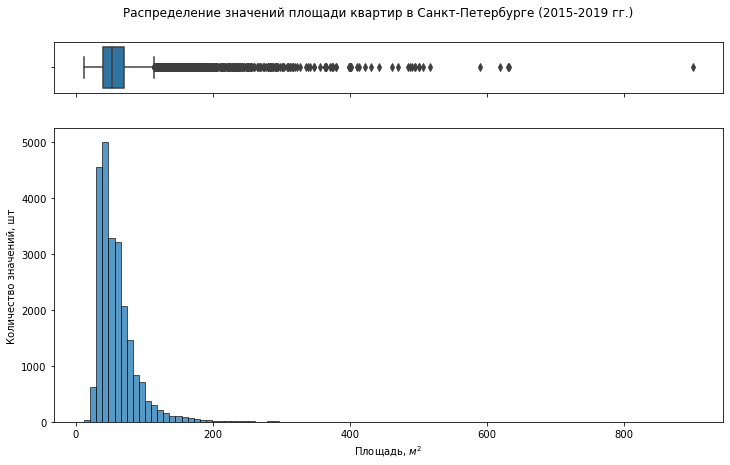

In [24]:
show_boxplot_and_hist(df['total_area'], 
                      title = 'Распределение значений площади квартир в Санкт-Петербурге (2015-2019 гг.)',
                      xlabel = 'Площадь, $м^2$'                      
); 

После 200 $м^2$ столбцы гистограммы сливаются с нулём, кроме того в размах усов попадают только значения примерно до 120 $м^2$

Посмотрим, как много квартир имеет площадь свыше 200

In [25]:
print('Квартир с площадью больше 200 м2:', df[df['total_area']>200]['total_area'].count())

Квартир с площадью больше 200 м2: 227


Запомним значение для дальнейшей фильтрации.
Посмотрим, как выглядит гистограмма для отфитрованных значений

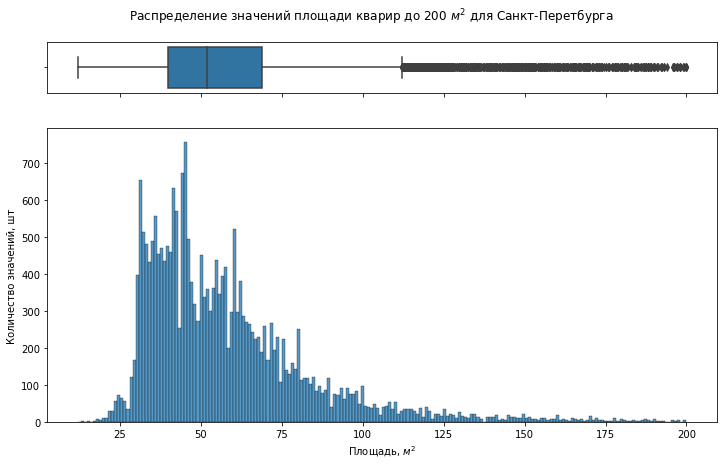

In [26]:
total_area_over = 200
show_boxplot_and_hist(
    df[df['total_area'].between(0,200)]['total_area'], bins=200,
    title = 'Распределение значений площади кварир до 200 $м^2$ для Санкт-Перетбурга',
    xlabel = 'Площадь, $м^2$'                      
);

Диаграмма с провалами и всплесками. Но это закономерно: есть квартиры, сделанные по одинаковым проектам / стандартам - они дают максимумы, есть напротив квартиры с более радкой планировкой

#### Цена квартиры

Посмотрим, как много квартир стоимостью свыше 100 млн.
и построим гистограмму для квартир ниже этой стоимости

Квартир стоимостью больше 100 млн: 37


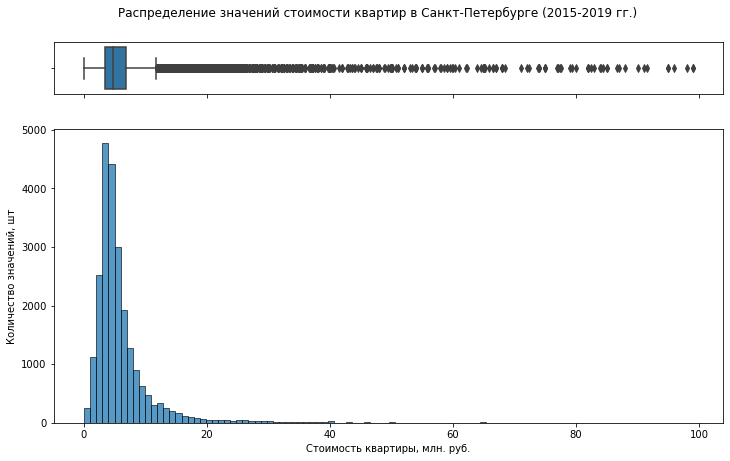

In [27]:
print('Квартир стоимостью больше 100 млн:', df[df['last_price']>100e6]['last_price'].count())
show_boxplot_and_hist(
    df[df['last_price'].between(0,1e8)]['last_price'],
    title = 'Распределение значений стоимости квартир в Санкт-Петербурге (2015-2019 гг.)',
    xlabel = 'Стоимость квартиры, млн. руб.',
    xformat = ['.0f',1e-6]
);

После 25 млн. столбцы гистограммы сливаются с нулём, в размах усов попадают только значения примерно до 12 млн. Возможно, разумно рассматривать квартиры дешевле 25 млн.


In [28]:
print('Квартир стоимостью больше 25 млн:', df[df['last_price']>25e6]['last_price'].count())

Квартир стоимостью больше 25 млн: 464


Запомним значение

Выведем первые и последние 5 квартир стоимостью меньше 1 млн с названием населённого пункта

In [29]:
last_price_over = 25e6
df[df['last_price'].between(0,1e6)][['total_area','last_price','m2_cost','rooms','locality_name']].sort_values(by='last_price')

,total_area,last_price,m2_cost,rooms,locality_name
8793,109.0,12190,112,2,Санкт-Петербург
17456,30.4,430000,14145,1,Сланцы
14911,54.0,430000,7963,2,поселок станции Свирь
16274,40.0,440000,11000,1,деревня Старополье
9581,43.4,450000,10369,2,деревня Старополье
...,...,...,...,...,...
19617,29.2,1000000,34247,1,поселок Заводской
7953,45.0,1000000,22222,2,поселок Алексеевка
19932,48.0,1000000,20833,2,Пикалево
15123,29.0,1000000,34483,1,Кириши


Логично, что дешёвые квартиры находятся за пределами Санкт-Петербурга, однако цена квартиры в первой строчке явно ошибочна. Сюда могла попасть квартира из объявления об аренде, хотя тоже слишком дёшево, скорее всего не хватает 3 нолей. Аномалии с дешёвыми и дорогими квартирами лучше оценивать по стоимости квадратного метра. Посмотрим какова средняя цена квадратного метра для квартир с похожей площадью в Питере. 

In [30]:
df[df['total_area'].between(100,120) & (df['locality_name']=='Санкт-Петербург')]['m2_cost'].mean()

131197.392

Если аномально низкую цену умножить на 1000, то довольно близко. Заменим значение

In [31]:
df.loc[df['last_price']<100000,'last_price'] *= 1000

#### Количество комнат

Построим гистограмму, ограничив количество комнат 10 и посмотрим, какое количество квартир имеет большее число комнат

Квартир с количеством комнат 10 и более: 11


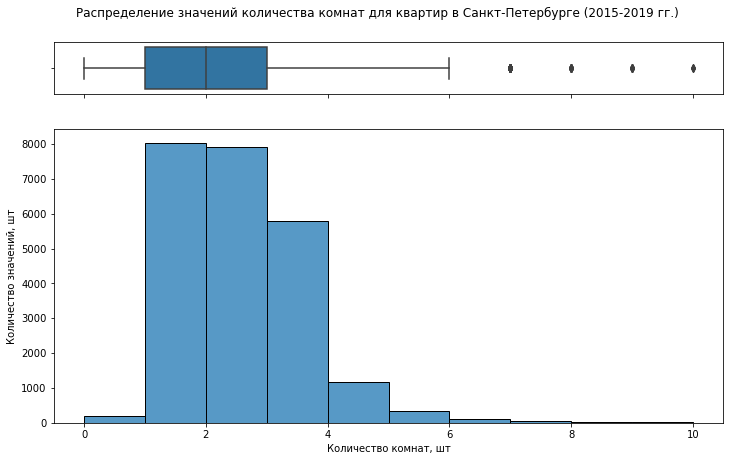

In [32]:
print('Квартир с количеством комнат 10 и более:', df[df['rooms']>=10]['rooms'].count())
show_boxplot_and_hist(
    df[df['rooms'].between(0,10)]['rooms'], bins=10,                
    title = 'Распределение значений количества комнат для квартир в Санкт-Петербурге (2015-2019 гг.)',
    xlabel = 'Количество комнат, шт'
);

Значение 10 кажется приемлемым для анализа. Запомним значение

In [33]:
rooms_over = 10

#### Высота потолков

При первом просмотре диаграммы размаха, в глаза бросилось значение высоты потолков 100. Его отбросим. Также заметили островок значений от 20 до 40. Посмотрим на него внимательнее

In [34]:
df.loc[df['ceiling_height']==100,'ceiling_height'] = np.nan  
df[df['ceiling_height'].between(20,40)]['ceiling_height']

355      25.0
3148     32.0
4643     25.0
4876     27.0
5076     24.0
5246     27.0
5669     26.0
5807     27.0
6246     25.0
9379     25.0
10773    27.0
11285    25.0
14382    25.0
17496    20.0
17857    27.0
18545    25.0
20478    27.0
20507    22.6
21377    27.5
21824    27.0
22336    32.0
22938    27.0
Name: ceiling_height, dtype: float64

Разделим эти значения на 10

In [35]:
df.loc[df['ceiling_height'].between(20,40),'ceiling_height'] /= 10  

Посмотрим, как теперь выглядит диаграмма размаха

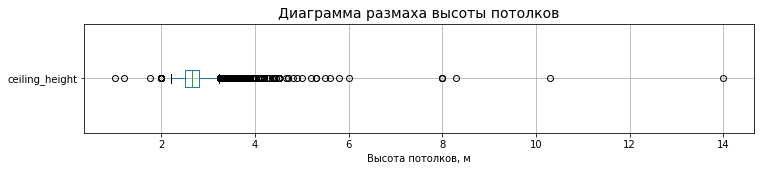

In [36]:
df.boxplot('ceiling_height', vert=False, figsize=(12,2));
plt.title('Диаграмма размаха высоты потолков',fontsize=14);
plt.xlabel('Высота потолков, м');

Значения больше 8 и меньше 2 выбиваются. Кроме того, вряд ли высота потолков может быть меньше 2 метров. Не обращаясь к СНИПам допустим, что минимально возможная высота потолка должна быть не меньше 2.4 м. Верхнюю границу возьмём равной 4.5, выше скорее всего совсем уж уникальные случаи, проверим

In [37]:
print('Слишком низких и слишком высоких:', 
      df.query('ceiling_height<=2.4 or ceiling_height>4.5')['ceiling_height'].count())

Слишком низких и слишком высоких: 66


Таких значений немного, заменим их на NaN

In [38]:
df.loc[(df['ceiling_height']<=2.4) | (df['ceiling_height']>4.5),'ceiling_height'] = np.nan  

Теперь поcтроим гистограмму

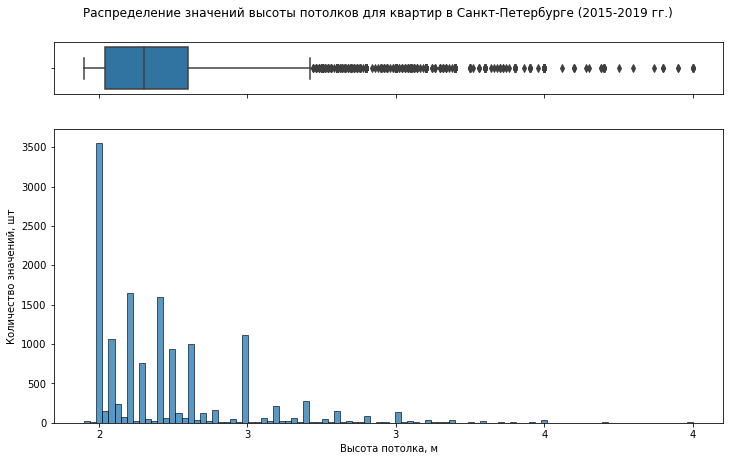

In [39]:
show_boxplot_and_hist(df['ceiling_height'],
    title = 'Распределение значений высоты потолков для квартир в Санкт-Петербурге (2015-2019 гг.)',
    xlabel = 'Высота потолка, м',
);

Распределение похоже на пуассоновское, это логично. Поскольку больше всего строится домов с минимально допустимой по стандарту высотой потолков, так дешевле. Наличие нескольких максимумов вероятнее всего связано с тем, что в разные годы был разный стандарт высоты потолков и тем, что часто при измерении высоты потолка это значение округляется.

#### Время размещения

Диаграмма размаха и гистограмма

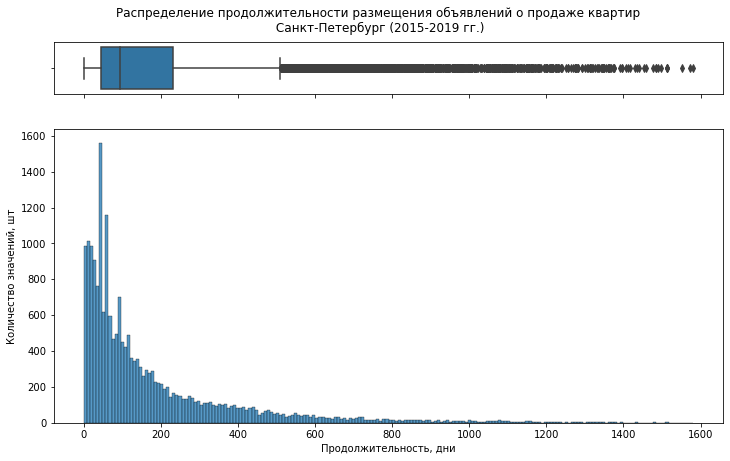

In [40]:
show_boxplot_and_hist(df['days_exposition'], bins=200,
    title = 'Распределение продолжительности размещения объявлений о продаже квартир\n Санкт-Петербург (2015-2019 гг.)',
    xlabel = 'Продолжительность, дни',
);

Можно примерно оценить нетипично долгое время продажи. Размах правого уса приходится на значение примерно в 500 дней. Больше полутора лет объявления вясят уже редко. Посмотрим как много объявлений провисело больше 900 дней.

Бросаются в глаза выбивающиеся значения в левой части диаграммы. Оценим среднее и медиану. Для наглядности можно построить распределение с помощью `distplot`.

Объявлений размещённых дольше 900 дней: 407
Время размещения:
    Среднее   = 180.7531998045921 
    Медианное = 95.0


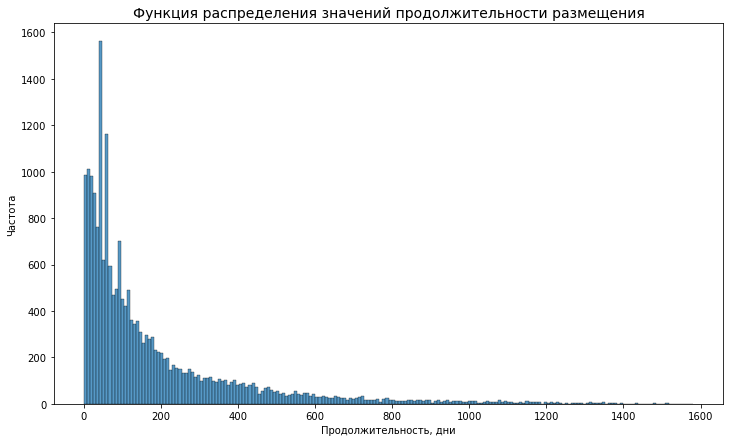

In [41]:
# строим график
_, ax = plt.subplots(figsize=(12,7))
sns.histplot(df['days_exposition'], bins=200);
ax.set(title = 'Функция распределения значений продолжительности размещения',
    xlabel = 'Продолжительность, дни',
    ylabel = 'Частота'
);

# выводим количество квартир, продававшихся более 2х лет
print('Объявлений размещённых дольше 900 дней:', 
      df[df['days_exposition']>900]['days_exposition'].count())
# выводим среднее и медиану
print('Время размещения:\n    Среднее   =', df['days_exposition'].mean(),
                       '\n    Медианное =', df['days_exposition'].median())

Итак, ограничимся объявлениями, размещёнными не дольше 900 дней. Запомним это значение

Среднее значение отличается от медианного в 2 раза. И действительно, максимум функции распределения лежит правее максимума гистограммы из-за выбивающихся значений. Посмотрим на них поближе. Выберем первые 100 значений. Помимо гистограммы выведем их в порядке убывания количества строк `rooms` (поскольку в нём нет пропусков) для каждого значения. Выводим для того, чтобы точно определить, какие значения выбиваются 

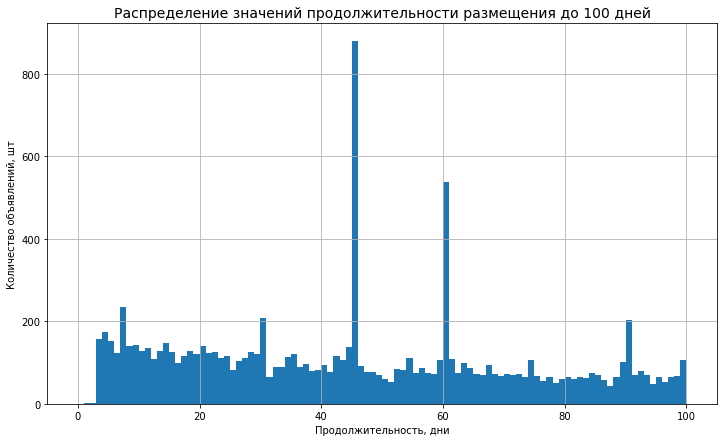

In [42]:
days_exposition_over = 900

# таблица
( df.query('days_exposition < 100')
          .pivot_table(index='days_exposition', values='rooms', aggfunc='count')
          .sort_values(by='rooms',ascending=False).head(10)
)
# график
df['days_exposition'].hist(range=(0,100), bins=100, figsize=(12,7)).set(
    title = 'Распределение значений продолжительности размещения до 100 дней',
    xlabel = 'Продолжительность, дни',
    ylabel = 'Количество объявлений, шт'
);

Особенно выделяются значения дней размещения равные 30, 45, 60 и 90, есть кратность 15. Возможно эти пики приходятся на объявления крупных агенств недвижимости, которые снимают и размещают заново объявления по прошествии определённого срока.

Удалим строки с выбивающимися значениями. Поскольку число значений 45, 60 и 90 отличаются от числа соседних им более чем в 2 раза, то удалим их. Запишем их в список

Также посмотрим на очень короткие сроки размещения. Выведем первые 10 значений

In [43]:
days_exposition_eject = [45, 60, 90]
df.query('days_exposition < 10').pivot_table(
    index='days_exposition', values='rooms', aggfunc='count')

,rooms
days_exposition,
1.0,1
2.0,3
3.0,158
4.0,174
5.0,152
6.0,124
7.0,234
8.0,139
9.0,142


Уберём также объявления, которые были размещены менее 3 дней

In [44]:
days_exposition_lower = 2

Посмотрим как изменилась гистограмма при исключении выбивающихся значений

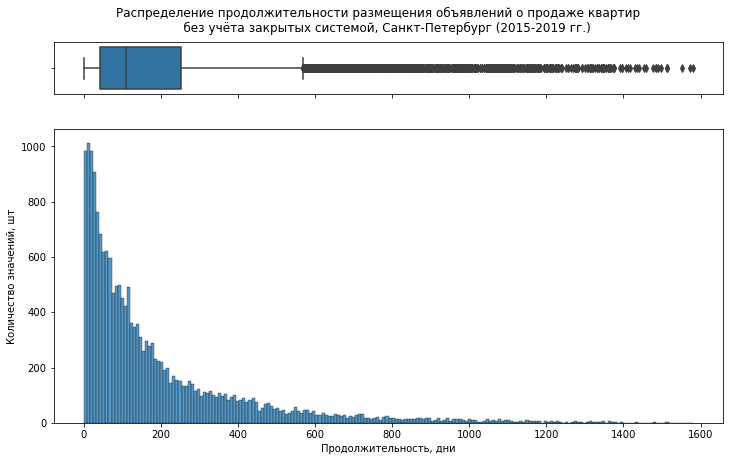

In [45]:
show_boxplot_and_hist(df.query('not days_exposition in [45,60,90]')['days_exposition'], bins=200,
    title = 'Распределение продолжительности размещения объявлений о продаже квартир\n \
    без учёта закрытых системой, Санкт-Петербург (2015-2019 гг.)',
    xlabel = 'Продолжительность, дни',
);

### Исключение редких и выбивающихся значений

Создадим датафрейм на основе исходного, в который поместим отфильтрованные значения

Для высоты потолков все неправдоподобные значения заменили на NaN, поэтому отфильтруем строки, для которых площадь `total_area < total_area_over`, цена `last_price < last_price_over`, количество комнат `rooms < rooms_over`, время размещения `days_exposition < days_exposition_over` и не равно значениям из `days_exposition_eject`. Чтобы не отсеять строки с пропусками в днях размещения добавим проверку `days_exposition != days_exposition`, потому что NaN не равен сам себе

In [46]:
df_f = df.query('total_area < @total_area_over and \
     last_price < @last_price_over and rooms < @rooms_over and\
     ( (@days_exposition_lower < days_exposition < @days_exposition_over) \
     or (days_exposition != days_exposition) ) and \
     days_exposition not in @days_exposition_eject')
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21102 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21102 non-null  int16         
 1   last_price            21102 non-null  int32         
 2   total_area            21102 non-null  float64       
 3   first_day_exposition  21102 non-null  datetime64[ns]
 4   rooms                 21102 non-null  int16         
 5   ceiling_height        13045 non-null  float64       
 6   floors_total          21023 non-null  float64       
 7   living_area           19878 non-null  float64       
 8   floor                 21102 non-null  int16         
 9   is_apartment          2459 non-null   object        
 10  studio                21102 non-null  bool          
 11  open_plan             21102 non-null  bool          
 12  kitchen_area          19487 non-null  float64       
 13  balcony         

Посмотрим как изменились теперь диаграммы рассеяния и гистограммы

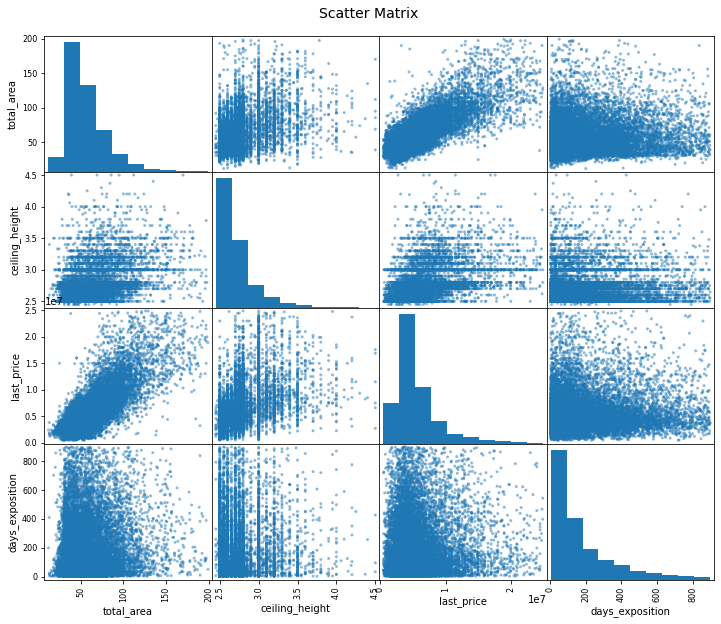

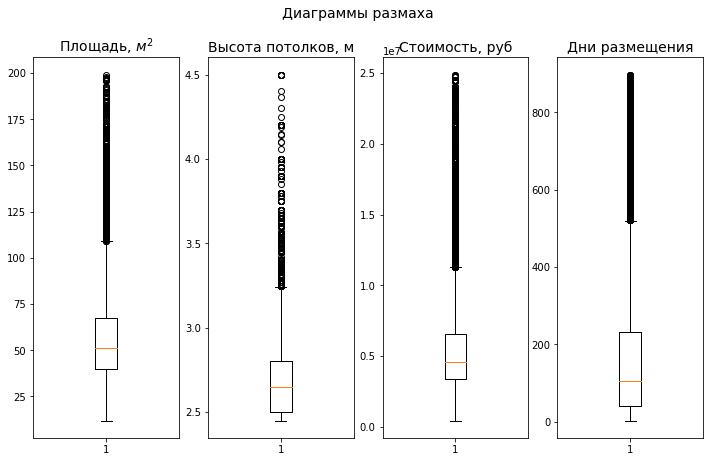

In [47]:
show_scatter_matrix(df_f, ['total_area','ceiling_height','last_price','days_exposition'])

show_boxplots(df_f, ['total_area','ceiling_height','last_price','days_exposition'],
              col_titles=['Площадь, $м^2$','Высота потолков, м','Стоимость, руб','Дни размещения'])

Ещё остались значения, которые немного выбиваются на диаграммах рассеяния, но от основных проблемных значений мы избавились

### Зависимость стоимости квартиры от других факторов

Чтобы оценить, какие из параметров влияют сильнее всего на стоимость вычислим коэффициенты корреляции. Воспользуемся методом `corr` библиотеки `pandas`. Он вычислит коэффициенты корреляции между столбцами. Помимо цены выберем столбцы:площадь, количество комнат, высота потолка, расстояние до центра. Логично, что эти параметры должны в значительной степени влиять на стоимость. 

Для наглядности в результирующей ячейке закрасим ячейки с помощью `.style.background_gradient`, установим точность в 2 знака после запятой.

In [48]:
def styled_corr(df, cols):
    return df[cols].corr().style.background_gradient(cmap='coolwarm').set_precision(2)
# из-за версии pandas пришлось убрать vmin и vmax 
styled_corr(df_f, ['last_price','total_area','rooms','ceiling_height','cityCenters_nearest'])

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.00,0.78,0.50,0.51,-0.37
total_area,0.78,1.00,0.80,0.45,-0.22
rooms,0.50,0.80,1.00,0.23,-0.16
ceiling_height,0.51,0.45,0.23,1.00,-0.35
cityCenters_nearest,-0.37,-0.22,-0.16,-0.35,1.00


Для ответа на поставленный вопрос нам достаточно изучить первый столбец. 

Сильнее всего цена коррелирует с площадью, что вполне логично. Также сильно зависит от числа комнат и высоты потолков. Положительный знак коэффициента корреляции означает, что с увеличением этих параметров цена также увеличивается. Зависимость от расстояния до центра меньше, но всё же существенна. Знак минус говорит о том, что с увеличением расстояния цена уменьшается.

Также по матрице корреляции можно оценить, как сильно взаимосвзяны друг с другом остальные параметры. Забавно, что дальше от центра в среднем потолки ниже...

Таким же способом посмотрим, как сильно другие картографические данные

In [49]:
styled_corr(df_f, ['last_price','airports_nearest','parks_around3000','ponds_around3000'])

,last_price,airports_nearest,parks_around3000,ponds_around3000
last_price,1.00,-0.07,0.18,0.19
airports_nearest,-0.07,1.00,0.01,-0.06
parks_around3000,0.18,0.01,1.00,0.29
ponds_around3000,0.19,-0.06,0.29,1.00


Расстояние до аэропорта влияет слабо, а вот наличие парковок и водоёмов - уже сильнее

Ещё посмотрим, как сильно влияет дата размещения, количество балконов и то, является ли квартира студией, имеет ли свободую планировку.

In [50]:
styled_corr(df_f, ['last_price','year','month','weekday','balcony','studio','open_plan'])

,last_price,year,month,weekday,balcony,studio,open_plan
last_price,1.00,-0.01,-0.01,-0.02,0.03,-0.06,-0.04
year,-0.01,1.00,-0.28,-0.01,0.01,0.02,-0.02
month,-0.01,-0.28,1.00,0.01,0.00,0.00,0.02
weekday,-0.02,-0.01,0.01,1.00,-0.00,-0.00,0.01
balcony,0.03,0.01,0.00,-0.00,1.00,0.03,0.03
studio,-0.06,0.02,0.00,-0.00,0.03,1.00,-0.00
open_plan,-0.04,-0.02,0.02,0.01,0.03,-0.00,1.00


Как и ожидалось с этими параметрами цена коррелирует слабо. 

#### Площадь квартиры

В матрице рассеяния мы уже видели что диаграмма рассеяния цена - площадь в целом отражает линейную зависимость, в cреднем с ростом площади стоимость квартиры растёт. Есть точки, выбивающиеся из общего скопления, но таких немного. Например, точки, со значенями большой площади квартиры и низкой цены могут соответсвовать квартирам за городом или квартирам с отсутсвующим ремонтом.

Применим метод `regplot()` библиотеки `seborn`, который строит линию регрессии по диаграмме рассеяния. Передадим параметр `x_bins`, чтобы вместо диаграммы рассеяния строились средние значения с доверительным интервалом для `x_bins` подгрупп набора данных. Изменим цвет линии на красный

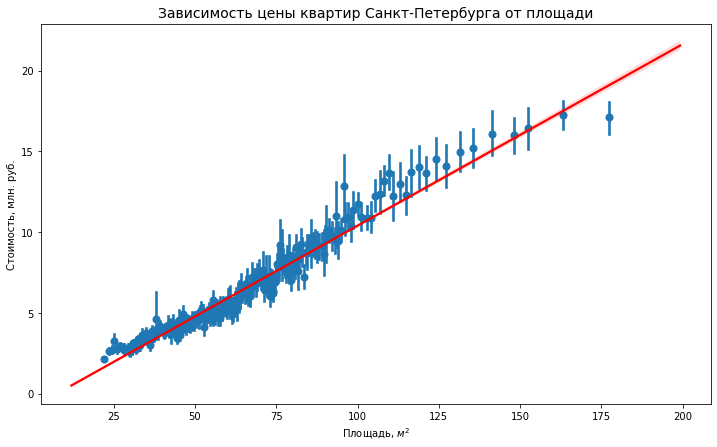

In [51]:
_, ax = plt.subplots()
sns.regplot(data=df_f, x='total_area', y='last_price', x_bins=400, line_kws={"color": "red"});
ax.set(title = 'Зависимость цены квартир Санкт-Петербурга от площади',
    xlabel = 'Площадь, $м^2$',
    ylabel = 'Стоимость, млн. руб.'
);
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)))

До 60 $м^2$ рост цены от площади медленнее, в диапазоне от 60 до 120 каждый $м^2$ дорожает сильнее. При значениях более 140 цена уже не так сильно зависит от площади, это говорит о том, что на цену квартир большой площади должны влиять другие параметры.

#### Число комнат и этаж

Посмотрим на значения средней цены квартир в зависимости от числа комнат и этажа. Воспользуемся методом `.barplot` библиотеки `seaborn`. Чтобы высота столбцов диаграммы характеризовала среднюю цену, передадим в параметр `y` название столбца `last_price`, чтобы отдельный столбец соответсвовал количество комнат передадим в `x` столбец `rooms`. Также вызовем метод два раза подряд с отличием в том, что во втором вызове метода добавим параметр `hue` с названием столбца категории этажа `floor_category`. Намеренно не будем добавлять между методами вызов `plt.show()`, чтобы обе столбцатые диаграммы были изображены на одном графике. Тогда мысможем наблюдать средние значения цены для всех квартир и средние для каждой категории в сравнении

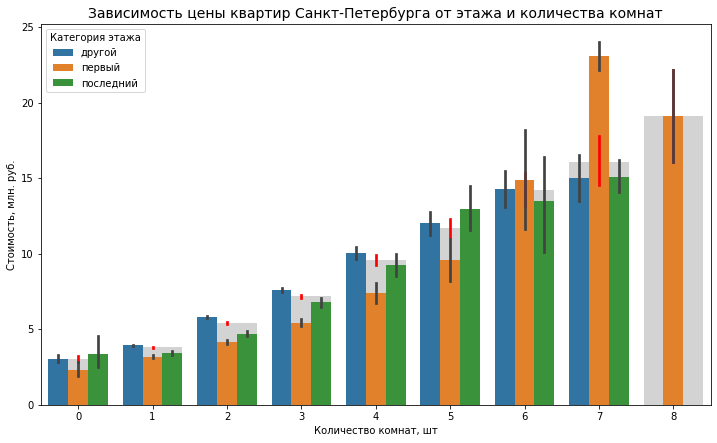

In [52]:
_, ax = plt.subplots()
sns.barplot(data = df_f, x='rooms', y='last_price',  color='lightgrey', errcolor='red');
sns.barplot(data = df_f, x='rooms', y='last_price',  hue='floor_category');
ax.legend(title='Категория этажа')
ax.set(title = 'Зависимость цены квартир Санкт-Петербурга от этажа и количества комнат',
    xlabel = 'Количество комнат, шт',
    ylabel = 'Стоимость, млн. руб.'
);
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)))

В целом ожидаемо, что ростом числа комнат, цена увеличивается. 

Также можно наблюдать, что для квартир с количестом комнат 1, 2, 3, 4 в среднем дешевле квартиры на первом и последем этажах. Для студий, где количество комнат равно 0, квартиры на первом этаже немного дешевле, на последнем - дороже, однако и разброс значений для них больше. Как ни странно аналогичная закономерность для 5-ти комнатных квартир. Для квартир с большим количеством комнат всё не так одназначно - разброс значений велик, но можно заключить, что для таких квартир чаще жильё на первом этаже дороже.

Посмотрим на ту же диаграмму с другой стороны, мы рассматривали диаграмму, сгруппированную по количеству комнат, теперь сгруппируем по категории этажа.

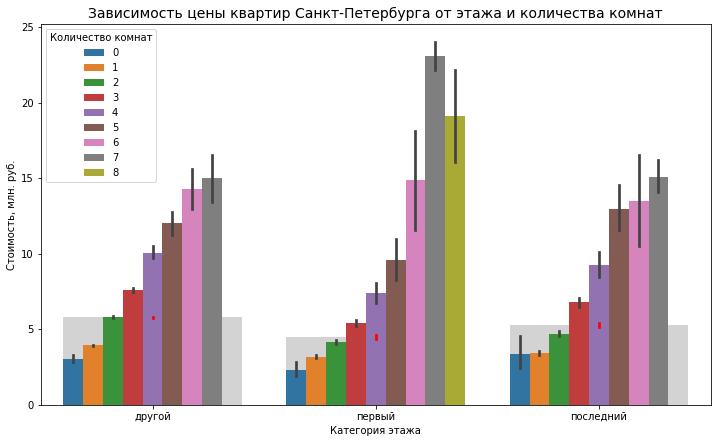

In [53]:
_, ax = plt.subplots(figsize=(12,7))
sns.barplot(data = df_f, x='floor_category', y='last_price',  color='lightgrey', errcolor='red');
sns.barplot(data = df_f, x='floor_category', y='last_price',  hue='rooms');
ax.legend(title='Количество комнат')
ax.set(title = 'Зависимость цены квартир Санкт-Петербурга от этажа и количества комнат',
    xlabel = 'Категория этажа',
    ylabel = 'Стоимость, млн. руб.'
);
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)))

Наблюдаем, что квартиры на первом этаже в среднем дешевле. А также, что многокомнатные квартры дают меньший вклад в общее среднее.

Кроме этого тут лучше видно, что для квартир на первом этаже цена растёт медленнее с ростом числа комнат вплоть до числа комнат 5, чем для других этажей. Для большого количества комнат квартры на первом этаже дороже, чем на других. Скорее всего это связано с тем, что к этой категории момимо квартир в многоэтажных домах относятся малоэтажные дома с собственной инфрастуктурой (гараж, подсобные помещения), соответсвенно и цена выше.

#### Удалённость от центра

Построим диаграмму рассеяния с помощью метода `.scatterplot` библиотеки `seaborn`, передадим в дополнительный параметр `hue` имя столбца принадлежности квартиры к Петербургу `locality_is_spb`, который мы добавляли ранее.

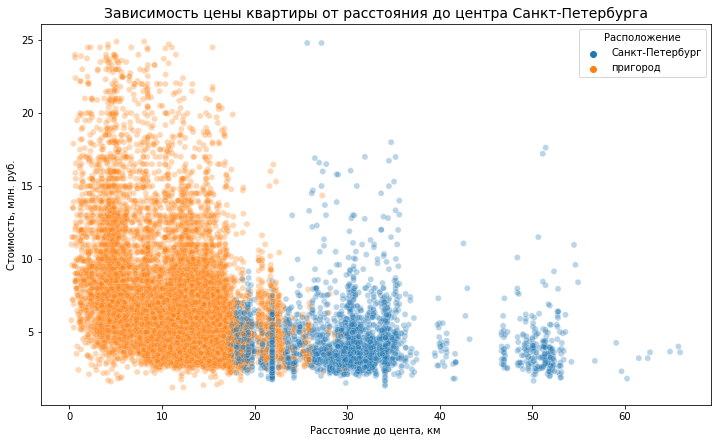

In [54]:
_, ax = plt.subplots()
sns.scatterplot(data=df_f, x='cityCenters_nearest', y='last_price', 
                hue='locality_is_spb', alpha=0.3);
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Санкт-Петербург', 'пригород'], title='Расположение')
ax.set(title = 'Зависимость цены квартиры от расстояния до центра Санкт-Петербурга',
    xlabel = 'Расстояние до цента, км',
    ylabel = 'Стоимость, млн. руб.'
);
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-3)));
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)));

Оранжевые точки соттветсвуют Санкт-Петербургу, синие - остальным населённым пунктам. Уже заметно, что чем дальше от центра, тем сильнее дешевле становятся квартиры. Кроме того на этой диаграмме мы уже видим, что примерно на значении 25 км расстояния от центра Санкт-Петербург заканчивается. Однако часть синих точек попала в область от 18 до 25 км, такова геометрия города) Редкие значения есть и значительно ближе к центру - населённые пункты в черте Петербурга. 

Заметна одна аномалия - в каком-то посёлке на расстоянии примерно 22 км от центра Питера продаётся довольно много квартир - заметна чёткая вертикальная линия.

Цена уменьшается по удалению от центра, при этом нелинейно. Оценим изменение средней цены всё тем же `.regplot()`, передадим необязательный параметр `logx = True`, чтобы посмотреть близка ли зависимость к логарифмической

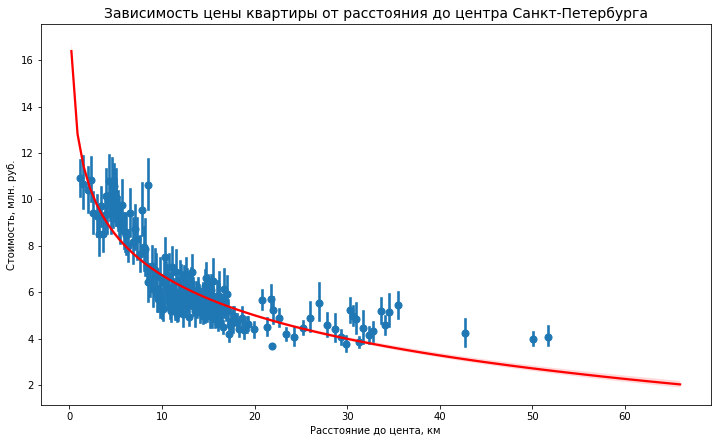

In [55]:
_, ax = plt.subplots()
sns.regplot(data=df_f, x='cityCenters_nearest', y='last_price', 
            x_bins=200, logx = True, line_kws={"color": "red"});
ax.set(title = 'Зависимость цены квартиры от расстояния до центра Санкт-Петербурга',
    xlabel = 'Расстояние до цента, км',
    ylabel = 'Стоимость, млн. руб.'
);
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-3)));
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)));

Действительно, чем ближе к центру, тем быстрее растёт цена. При этом на промежутке от 20 до 40 км средняя цена почти не зависит от удалённости от Петербурга. 

Можем вычислить посёлок с большим числом объявлений. С помощью `pivot_table` сгруппируем по имени посёлка, посчитаем количество указанных расстояний до центра, их среднее и минимальное значения

In [56]:
(df[df['cityCenters_nearest'].between(20000,24000)]
    .pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=['count', np.mean, min])
    .droplevel(1,axis=1).sort_values(by='count',ascending=False)
)

,count,mean,min
locality_name,,,
поселок Мурино,556,21888.000000,21888.0
Санкт-Петербург,448,21787.261161,20160.0
поселок Парголово,94,21637.829787,20206.0
поселок Стрельна,39,23291.025641,21813.0
поселок Шушары,15,23624.866667,22597.0


В посёлке Мурино в исследуемый период продавалось много квартир. Странно, но согласно Википедии население посёлка в эти года действительно росло... Совпадение? не думаю! Но в то же время это единственный посёлок, для которого минимальное значение совпадает со средним, но тут просто напросто причина в самих данных.

#### Дата публикации

**Год размещения.** Выведем две столбчатые диаграммы для цены и расстояния до центра сможем посмотреть на взаимосвязь данных. Сначала сгруппируем по столбцу года, в качестве значений для вычисления среднего передадим цену и расстояние до центра

cityCenters_nearest last_price           
                    mean      count       mean
year                                          
2014             13545.0       69.0  8822784.0
2015             13693.0      857.0  6066299.0
2016             14330.0     2492.0  5534036.0
2017             14704.0     7429.0  5456875.0
2018             15037.0     7527.0  5446297.0
2019             14282.0     2728.0  5886038.0

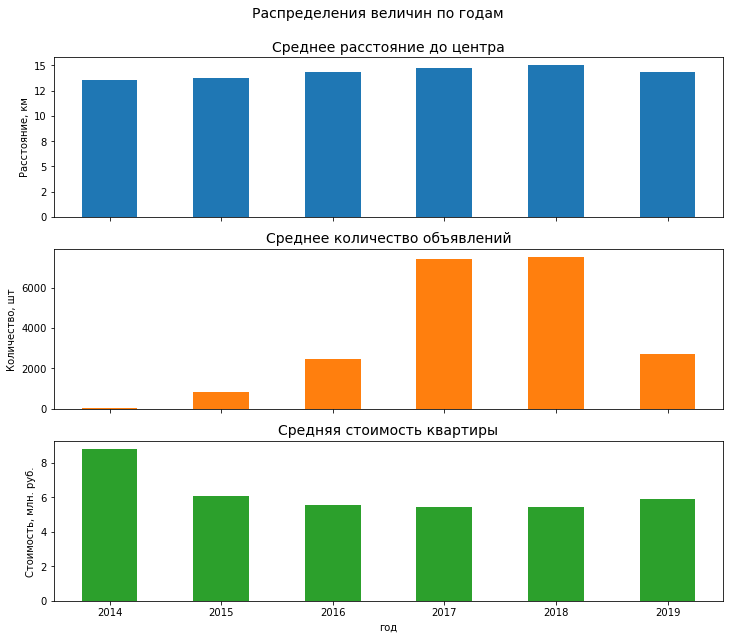

In [57]:
# таблица
df_year = df_f.pivot_table(
    index='year', values=['last_price', 'cityCenters_nearest'],
    aggfunc={'last_price': [np.mean, 'count'], 'cityCenters_nearest': np.mean}
).round()
display(df_year)

# график
ax = df_year.plot.bar(rot=0, subplots=True, figsize=(12,10), legend = False);
plt.suptitle('Распределения величин по годам', fontsize=14, y=0.95);
plt.xlabel('год');
ax[0].set(ylabel='Расстояние, км', title='Среднее расстояние до центра');
ax[1].set(ylabel='Количество, шт', title='Среднее количество объявлений');
ax[2].set(ylabel='Стоимость, млн. руб.', title='Средняя стоимость квартиры');
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-3)))
ax[2].yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)))

До 2017 года средняя стоимость снижалась, при этом увеличивалось среднее расстояние до центра, эти факты скорее всего взаимосвязаны. Снижение среднего значение обусловлено появлением большего числа объявлений в отдалении от центра, где квартры дешевле

Как видим количксво объявлений в 2017 и 2018 году значительно больше, чем в более ранные годы. Для 2019 года объявления представлены не за полный год

**Месяц размещения.** Выведем график зависимости цены от месяца. Сначала сгруппируем по столбцу месяца, в качестве значений для вычисления среднего передадим цену

,count,mean
month,,
1,1271,5.666054e+06
2,2311,5.634164e+06
3,2330,5.537537e+06
4,2209,5.625479e+06
5,1128,5.526304e+06
6,1550,5.339436e+06
7,1470,5.525979e+06
8,1571,5.510302e+06
9,1785,5.686193e+06


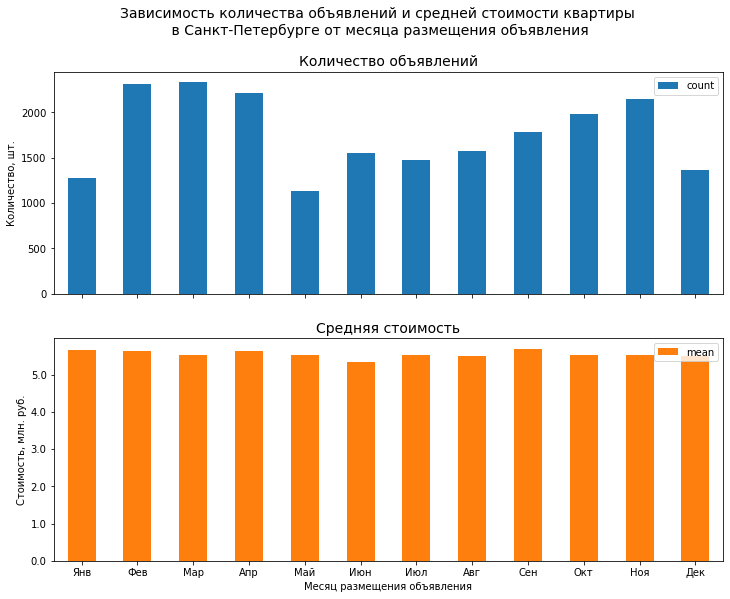

In [58]:
# таблица
df_month = df_f.pivot_table(index='month', values='last_price', 
                            aggfunc=['count','mean']).droplevel(1,axis=1)
display(df_month)
# график
ax = df_month.plot(rot=0, subplots=True, kind='bar', figsize=(12,9))
plt.suptitle('Зависимость количества объявлений и средней стоимости квартиры\n \
в Санкт-Петербурге от месяца размещения объявления', fontsize=14);
plt.xlabel('Месяц размещения объявления');
plt.xlim([-0.5, 11.5]),
plt.xticks([x-1 for x in list(df_month.index)], 
           ['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек'])
ax[0].set(title='Количество объявлений', ylabel = 'Количество, шт.');
ax[1].set(title='Средняя стоимость', ylabel = 'Стоимость, млн. руб.');
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.1f')%(y*1e-6)));

Больше всего объявлений выкладывают с Февраля по Апрель, меньше всего в Декабре, Январе, Мае. С Августа и на протяжении осенних месяцев наблюдается рост количества объявлений 

Самая низкая средняя цена в объявлениях за июнь, самая высокая - за сентябрь и январь. Может показаться, что стоит покупать квартиру в июне, но следует учитывать, что разница составляет всего 5-6 процентов от средней стоимости.

**День недели.** Выведем график зависимости цены от дня недели. Сначала сгруппируем по столбцу дня недели, в качестве значений для вычисления среднего передадим цену. Подписи по горизонтальной оси заменим на текстовые обозначения дня недели для простоты восприятия

,count,mean
weekday,,
0,3235,5.567021e+06
1,3750,5.595132e+06
2,3525,5.640449e+06
3,3827,5.653178e+06
4,3596,5.478324e+06
5,1696,5.349887e+06
6,1473,5.368033e+06


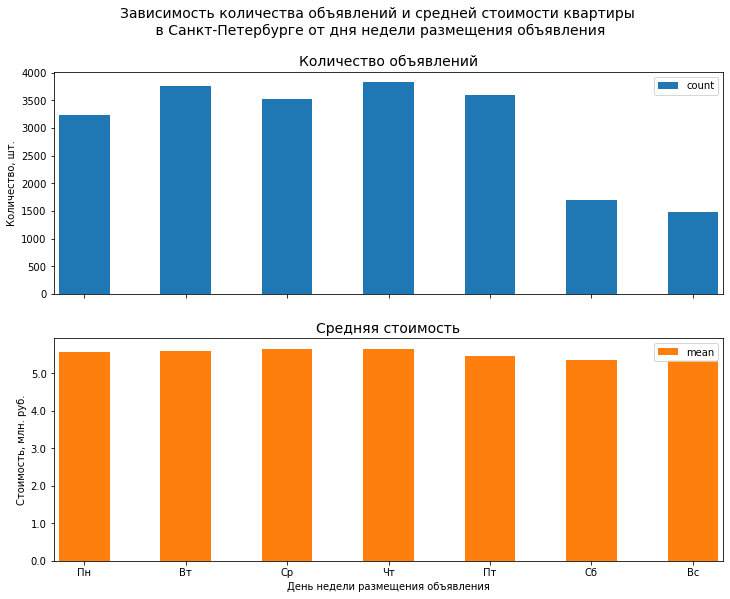

In [59]:
# таблица
df_weekday = df_f.pivot_table(index='weekday', values=['last_price'], 
                              aggfunc=['count','mean']).droplevel(1,axis=1)
display(df_weekday)
# график
ax = df_weekday.plot(rot=0, subplots=True, kind='bar', figsize=(12,9))
plt.suptitle('Зависимость количества объявлений и средней стоимости квартиры\n \
в Санкт-Петербурге от дня недели размещения объявления', fontsize=14);
plt.xlabel('День недели размещения объявления');
plt.xlim([-0.3,6.3])
plt.xticks(df_weekday.index, ['Пн','Вт','Ср','Чт','Пт','Сб','Вс'])
ax[0].set(title='Количество объявлений', ylabel = 'Количество, шт.');
ax[1].set(title='Средняя стоимость', ylabel = 'Стоимость, млн. руб.');
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.1f')%(y*1e-6)));


Больше всего объявлений выкладывается в рабочие дни.

Опять же разница между максимальным и минимальным значением стоиимости около 5 процентов от среднего. Однако можно сделать логичное предположение:
В выходные дни чаще выкладывают объявления непосредственно собственники квартир, в рабочие - агентства недвижимости, которые делают наценку, соответсвенно средняя цена в эти дни выше. Среднее значение в пятницу лежит где-то посередине, поскольку в пятницы выкладывают объявления как собственники так и агентства


### Населённые пункты с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений. Сохраним их в сводную таблицу `top10_m2_cost`

Посчитаем в этой таблице среднюю и медианную цену квадратного метра в этих населённых пунктах, оставим первые 10 строк, осортировав наш датасет по количесву объявлений.

In [60]:
top10_m2_cost = (df_f.pivot_table(index='locality_name', 
                                  values='m2_cost', 
                                  aggfunc=['count','mean','median'])
    .droplevel(1,axis=1).sort_values(by='count',ascending=False)
    .head(10).sort_values(by='median',ascending=False)
)
top10_m2_cost

,count,mean,median
locality_name,,,
Санкт-Петербург,14026,109567.638172,103975.0
Пушкин,337,102507.219585,99744.0
поселок Парголово,286,90719.104895,92272.0
деревня Кудрово,259,92218.710425,91667.0
поселок Мурино,511,85676.520548,85680.0
поселок Шушары,400,78826.587500,76876.0
Колпино,302,75545.768212,75000.0
Гатчина,279,68626.182796,67696.0
Всеволожск,361,68675.750693,65541.0



Самая высокая стоимость - в Санкт-Петербурге и Пушкине, самая низкая в Выборге и Гатчине

### Анализ объвлений для центра Санкт-Петербурга

#### Определение области, входящей в центр

Посчитайте среднюю цену для квартир, находящихся в Санкт-Петербурге для каждого километра. 
Построим график: он будет показывать, как цена зависит от удалённости от центра. 

In [61]:
# сначала добавим столбец с расстоянием в километрах
df_f['centers_nearest_km'] = (df_f['cityCenters_nearest']/1000).round()

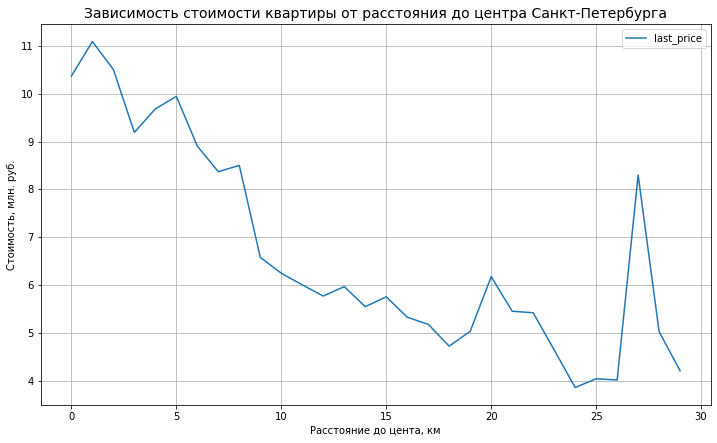

In [62]:
# отфильтруем значения, построим график
ax = (df_f.query('locality_is_spb')
     .pivot_table(index='centers_nearest_km', values='last_price')
     .plot(grid=True, figsize=(12,7))
);
ax.set(title = 'Зависимость стоимости квартиры от расстояния до центра Санкт-Петербурга',
    xlabel = 'Расстояние до цента, км',
    ylabel = 'Стоимость, млн. руб.'
);
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)));

Можем предположить, какая область входит в центр. До 9 км цена убывает быстрее. Определим эту область как центральную зону.

#### Анализ объявлений 

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
Для этого построим матрицу рассеяния

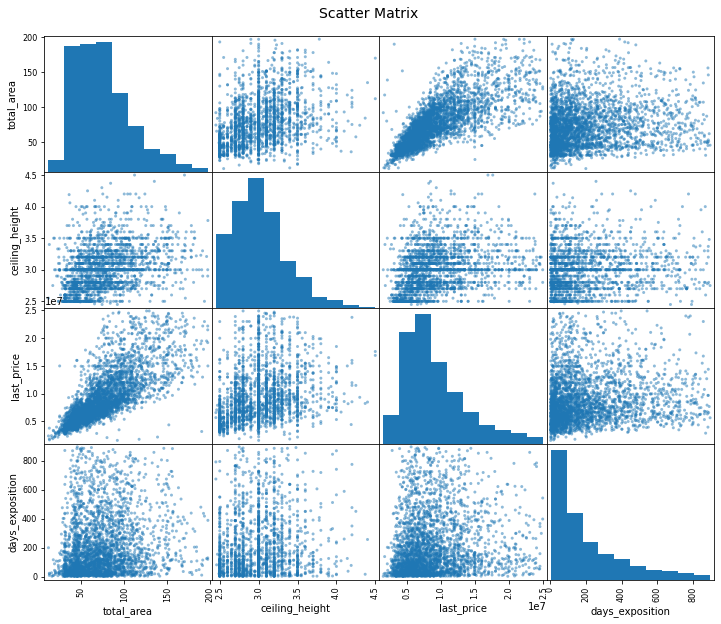

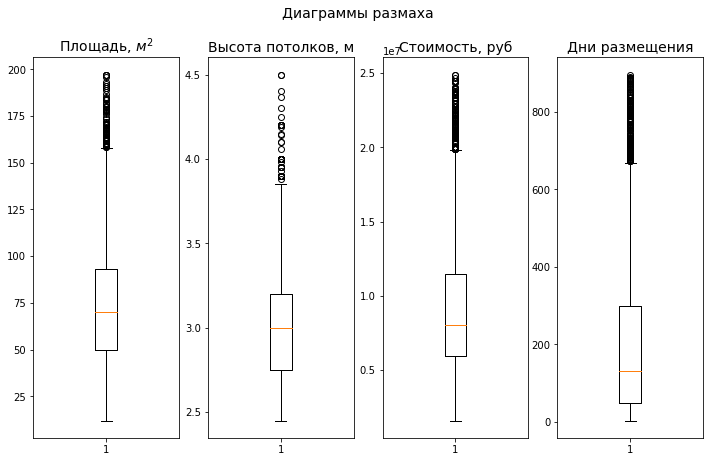

In [63]:
df_center = df_f.query('cityCenters_nearest < 9000')

show_scatter_matrix(df_center, ['total_area','ceiling_height','last_price','days_exposition'])

show_boxplots(df_center, ['total_area','ceiling_height','last_price','days_exposition'],
              col_titles=['Площадь, $м^2$','Высота потолков, м','Стоимость, руб','Дни размещения'])

По гистограммам видны отличия от всего набора данных:

- Гистограмма плошади теперь более плавная, в области максимума больше разных значений, то есть в центральной области квартиры более разнообразной планировки
- На гистограмме цены распределены более равномерно. Однако средняя цена выше примерно в 1,5 раза, видно по диаграмме размаха
- Процент многокомнатных квартир немного выше, видно из гистограммы комнат
- Максимум гистограммы высоты потолков сместился вправо, значит в центральной области выше доля квартир с высокими потолками
- Зависимость цены от площади стала более линейной
- В целом стало меньше выбросов

Также посмотрим как изменилось влияние параметров на стоимость. Выведем коэффициенты корреляции

In [64]:
display(styled_corr(df_center, ['last_price','total_area','rooms','ceiling_height','cityCenters_nearest']))
display(styled_corr(df_center, ['last_price','airports_nearest','parks_around3000','ponds_around3000']))
styled_corr(df_center, ['last_price','year','month','weekday','balcony','studio','open_plan'])

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.00,0.76,0.49,0.29,-0.18
total_area,0.76,1.00,0.80,0.36,-0.24
rooms,0.49,0.80,1.00,0.29,-0.24
ceiling_height,0.29,0.36,0.29,1.00,-0.40
cityCenters_nearest,-0.18,-0.24,-0.24,-0.40,1.00


,last_price,airports_nearest,parks_around3000,ponds_around3000
last_price,1.00,-0.00,0.08,0.10
airports_nearest,-0.00,1.00,0.01,0.02
parks_around3000,0.08,0.01,1.00,0.16
ponds_around3000,0.10,0.02,0.16,1.00


,last_price,year,month,weekday,balcony,studio,open_plan
last_price,1.00,0.00,-0.04,-0.02,0.08,-0.06,-0.03
year,0.00,1.00,-0.26,-0.02,-0.02,0.02,-0.02
month,-0.04,-0.26,1.00,0.04,0.01,0.02,0.01
weekday,-0.02,-0.02,0.04,1.00,0.02,0.01,0.02
balcony,0.08,-0.02,0.01,0.02,1.00,0.01,0.00
studio,-0.06,0.02,0.02,0.01,0.01,1.00,-0.00
open_plan,-0.03,-0.02,0.01,0.02,0.00,-0.00,1.00


Для центральной области площадь и число комнат влияют на стоимость также сильно, как для всего города, высота потолка уже влияет значительно меньше, как и наличие парковок и водоёмов поблизости.

Посмотрим на зависимость цены от других параметров для центральной области в сравнении со всеми объявлениями


##### Площадь

Посмотрим на диаграмму рассеяния площадь-стоимость

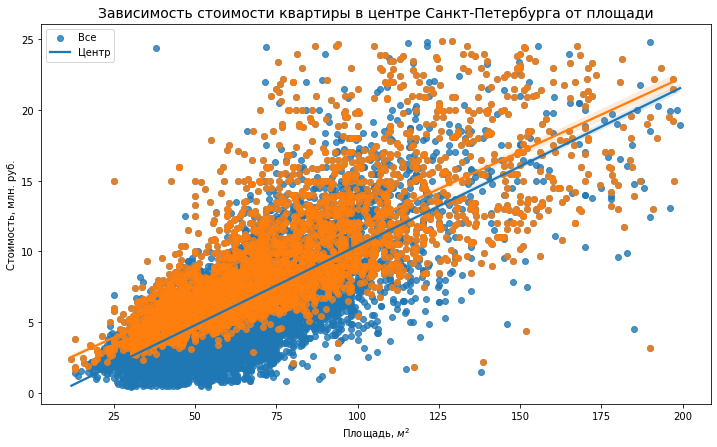

In [65]:
_, ax = plt.subplots()
sns.regplot(data=df_f, x='total_area', y='last_price');
sns.regplot(data=df_center, x='total_area', y='last_price');
ax.set(title = 'Зависимость стоимости квартиры в центре Санкт-Петербурга от площади',
    xlabel = 'Площадь, $м^2$',
    ylabel = 'Стоимость, млн. руб.'
);
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)));
ax.legend(['Все', 'Центр']);

Теперь видно, что зависимость стала более линейной по причине исключения более дешёвого жилья с окраин 

##### Высота потолков

Посмотрим на диаграмму рассеяния высота потолков-стоимость

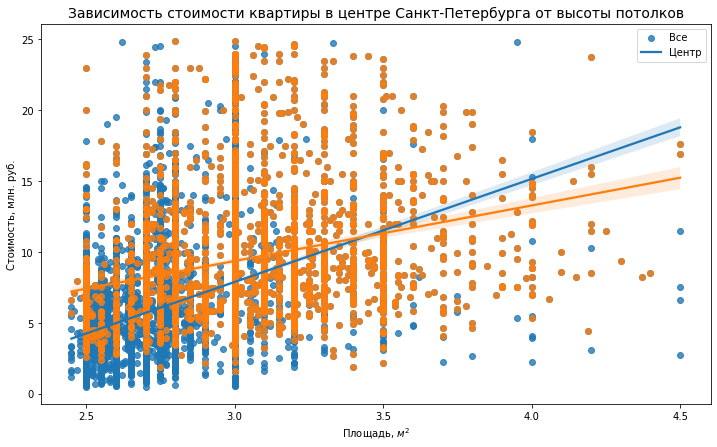

In [66]:
_, ax = plt.subplots()
sns.regplot(data=df_f, x='ceiling_height', y='last_price');
sns.regplot(data=df_center, x='ceiling_height', y='last_price');
ax.set(title = 'Зависимость стоимости квартиры в центре Санкт-Петербурга от высоты потолков',
    xlabel = 'Площадь, $м^2$',
    ylabel = 'Стоимость, млн. руб.'
);
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)));
ax.legend(['Все', 'Центр']);

Для центра стоимость с увеличением высоты потолка растёт медленнее

##### Удалённость от центра

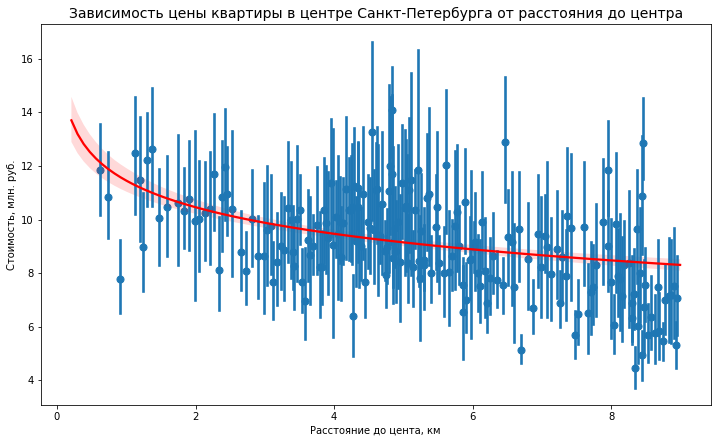

In [67]:
_, ax = plt.subplots()
sns.regplot(data=df_center, x='cityCenters_nearest', y='last_price', 
            x_bins=200, logx = True, line_kws={"color": "red"});
ax.set(title = 'Зависимость цены квартиры в центре Санкт-Петербурга от расстояния до центра',
    xlabel = 'Расстояние до цента, км',
    ylabel = 'Стоимость, млн. руб.'
);
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-3)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)))

Для центральной территории удалённость от самого центра влияет на стоимость намного меньше

##### Количество комнат и этаж

Снова построим столбчатые диаграммы, теперь для центра

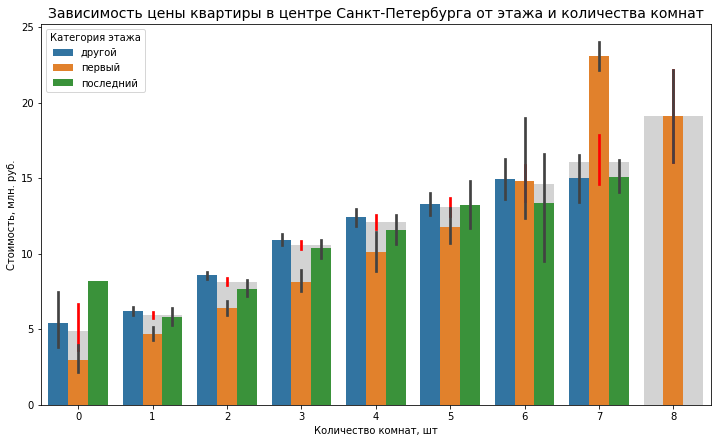

In [68]:
_, ax = plt.subplots()
sns.barplot(data = df_center, x='rooms', y='last_price',  color='lightgrey', errcolor='red');
sns.barplot(data = df_center, x='rooms', y='last_price',  hue='floor_category');
ax.legend(title='Категория этажа')
ax.set(title = 'Зависимость цены квартиры в центре Санкт-Петербурга от этажа и количества комнат',
    xlabel = 'Количество комнат, шт',
    ylabel = 'Стоимость, млн. руб.'
);
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, pos: ('%.f')%(y*1e-6)))

В целом всё почти как для всего датасета, но для студий разница в цене для первого и последнего этажей уже ощутимие

Посмотрим отдельно столбчатые диаграммы для средних цен по количеству комнат. Напишем функцию которая будет возвращать столбчатые диаграммы на основе сводных таблиц из датаcетов для центра и для всего города по переданному столбцу

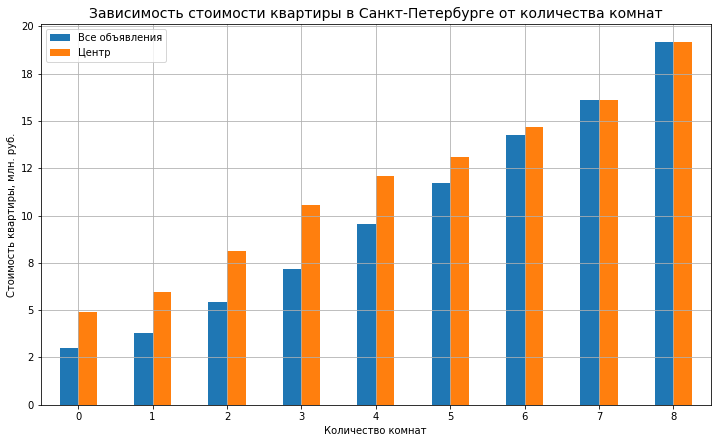

In [69]:
def all_and_center_plot(col, values='last_price', aggfunc='mean', pivot_table=False,
    grid=True, kind='bar',     
    title='Заголовок не задан', xlabel='x', ylabel='y',
    yformat=['.d',1e0]):
    '''
    Генеририрует сводную таблицу на основе двух датасетов df_f и df_center
    col - название столбца, используемого в качестве индекса результирующей таблицы
    pivot_table - флаг, возвращать ли сводную таблицу
    values, aggfunc - аргументы метода pivot_table
    grid, kind - аргуманты метода plot
    title - задаёт название графика
    xlabel, ylabel - подписи к осям
    yformat - форматы вывода чисел на оси y, передаются в виде списка: 
        yformat[0] - str - формат вывода чисел,
        yformat[1] - float, int - множитель, кратно которому будут отображаться значения
    '''
    df_compare = (df_f.pivot_table(index=col, values=values, aggfunc=aggfunc)
           .merge(df_center.pivot_table(index=col, values=values, aggfunc=aggfunc),
                  on=col,suffixes=('_all','_center'))
    )
    ax = df_compare.plot(rot=0, grid=grid, kind=kind, figsize=(12,7))
    ax.legend(labels=["Все объявления","Центр"]);
    # добавим подписи
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.yaxis.set_major_formatter(
        FuncFormatter(lambda y, pos: ('%'+yformat[0])%(y*yformat[1])))
    
    if pivot_table: 
        return (ax, df_compare)
    else:
        return ax
    
all_and_center_plot('rooms', 
    title='Зависимость стоимости квартиры в Санкт-Петербурге от количества комнат',
    xlabel='Количество комнат', ylabel='Стоимость квартиры, млн. руб.',
    yformat=['.f',1e-6]);

В центре стоимость квартир с количеством комнат до 3 включительно растёт быстрее чем в целом по городу, с 4 до 6 комнат рост цены замедляется, и далее выравнивается

Теперь по этажу

,floor_category,last_price_all,last_price_center,last_price_all_diff,last_price_center_diff
0,другой,5.784072e+06,9.545684e+06,0.000000,0.000000
1,первый,4.490404e+06,7.140969e+06,0.223660,0.251916
2,последний,5.275795e+06,9.244487e+06,0.087875,0.031553


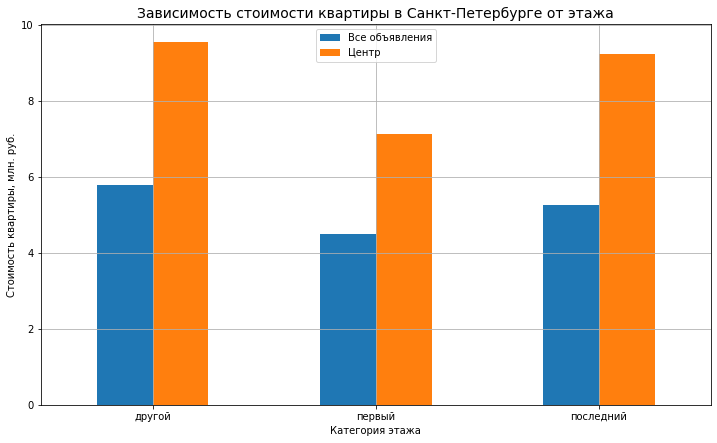

In [70]:
# сохраним таблицу и построим график
_, df_floor = all_and_center_plot('floor_category', pivot_table=True,
    title='Зависимость стоимости квартиры в Санкт-Петербурге от этажа',
    xlabel='Категория этажа', ylabel='Стоимость квартиры, млн. руб.',
    yformat=['.f',1e-6]);
# сбросим в таблице индекс, чтобы многоуровневость не мешала
df_floor = df_floor.reset_index()
# определим значение цены квартир из категории другой (самые дорогие)
last_price_all_max = df_floor['last_price_all'].max()
last_price_center_max = df_floor['last_price_center'].max()
# добавим столбец, который характоеризует, насколько цена на этаже отличается от самой дорогой в долях единицы
df_floor['last_price_all_diff'] = df_floor.apply(lambda row:
    (last_price_all_max - row['last_price_all'])/last_price_all_max, axis=1)
df_floor['last_price_center_diff'] = df_floor.apply(lambda row:
    (last_price_center_max - row['last_price_center'])/last_price_center_max, axis=1)
df_floor

По диаграмме может показаться, что разница цены для первого этажа и для других в процентном соотношении для квартир в центре значительно выше. Расчёты показывают, что это так, но не столь критично: в центре квартиры на первом этаже в среднем на 25 процентов дешевле квартир на другом этаже, для всего города - на 22.

##### Дата публикации <a id='center_date_analysis'></a>

**Год**

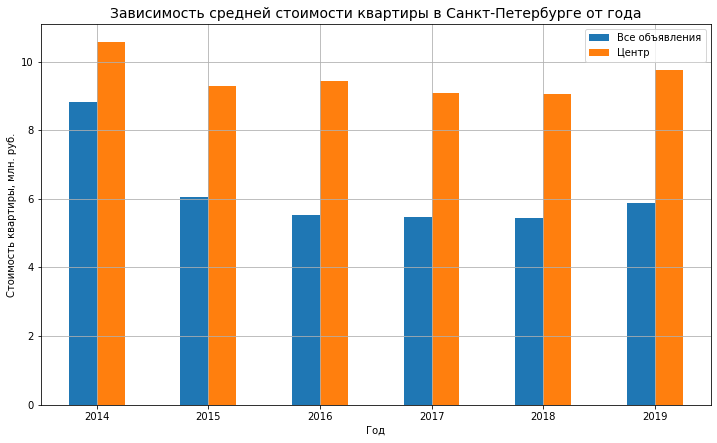

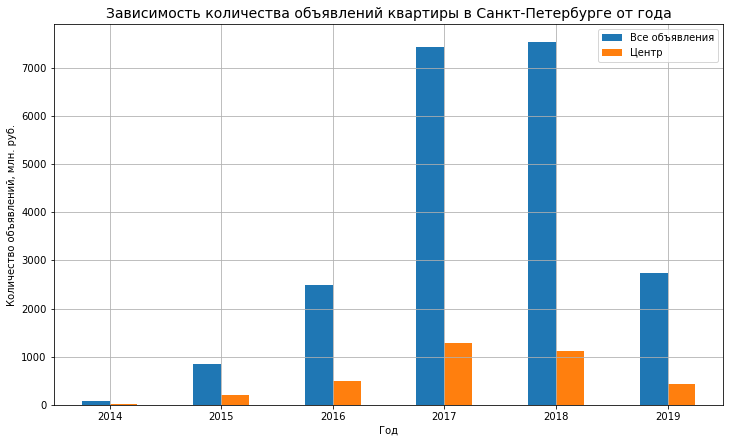

In [71]:
# сравнение по стоимости
all_and_center_plot('year',    
    title='Зависимость средней стоимости квартиры в Санкт-Петербурге от года',
    xlabel='Год', ylabel='Стоимость квартиры, млн. руб.',
    yformat=['.f',1e-6]);
# сравнение по стоимости
all_and_center_plot('year', aggfunc='count',
    title='Зависимость количества объявлений квартиры в Санкт-Петербурге от года',
    xlabel='Год', ylabel='Количество объявлений, млн. руб.');

С 2014 года до 2016 разница в средней стоимости квартир в центре и в городе увеличилась. Хотя 2014 год не особо показательный, ранее мы наблюдали в нём самый высокий разброс значений

Количество объявлений по всему городу росло вплоть до 2018 года, в центре - до 2017, в 2018 количество объявлений о продаже квартир в центре снизилось

**Месяц**

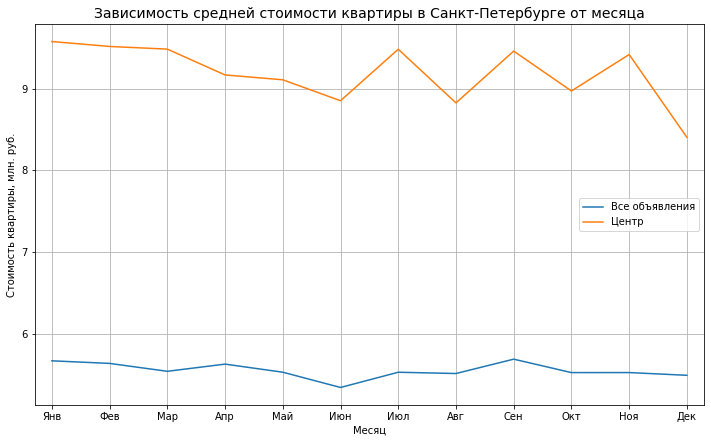

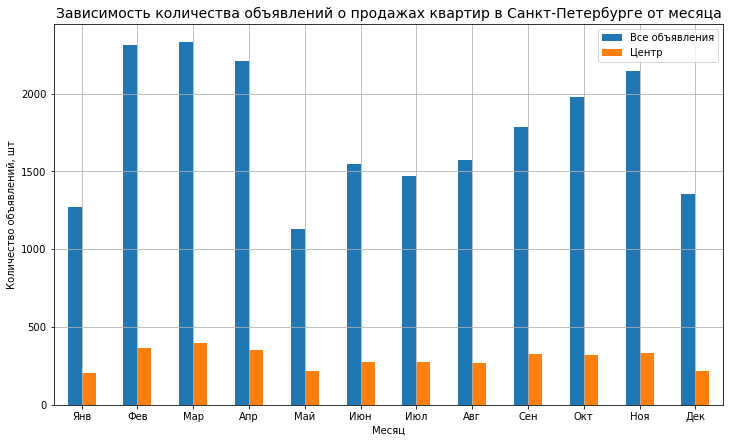

In [72]:
# сравнение по стоимости
ax = all_and_center_plot('month', kind='line',   
    title='Зависимость средней стоимости квартиры в Санкт-Петербурге от месяца',
    xlabel='Месяц', ylabel='Стоимость квартиры, млн. руб.',
    yformat=['.f',1e-6]);
ax.set(xlim = [0.7, 12.3],
    xticks = df_month.index,
    xticklabels = ['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек']
);

# сравннеие по количеству
ax = all_and_center_plot('month', aggfunc='count',   
    title='Зависимость количества объявлений о продажах квартир в Санкт-Петербурге от месяца',
    xlabel='Месяц', ylabel='Количество объявлений, шт');
ax.set(xlim = [-0.5, 11.5],
    xticks = [x-1 for x in list(df_month.index)],
    xticklabels = ['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек']
);

Тенденция количества размещаемых объявлений для центра практически такая же, как для всего города: максимальное и минимальное количество в те же месяцы. Но в осенние месяцы количество новых объявлений практически одинаково 

В течение первой половины года средняя стоимость квартир немного снижается. Далее циклично меняется. Сложно сказать, с чем это связано. Для центра помимо июля наблюдается провал цен в августе, декабре

**День недели**

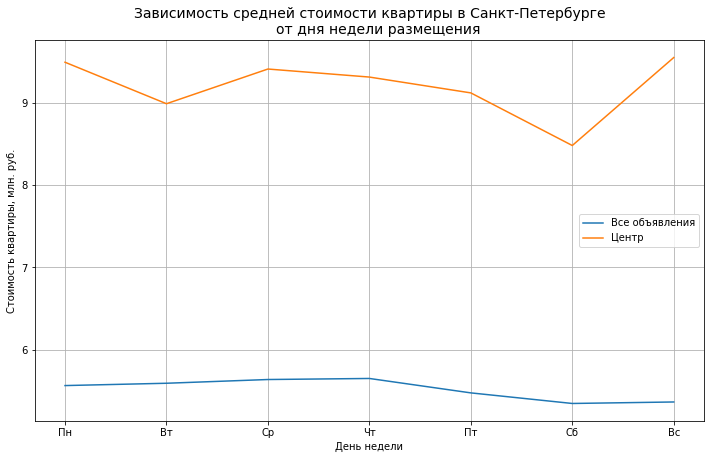

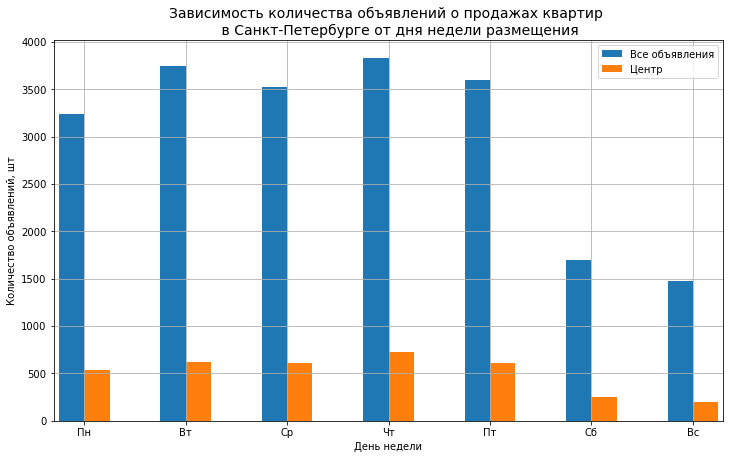

In [73]:
# сравнение по стоимости
ax = all_and_center_plot('weekday', kind='line', aggfunc='mean',
    title='Зависимость средней стоимости квартиры в Санкт-Петербурге\n\
    от дня недели размещения',
    xlabel='День недели', ylabel='Стоимость квартиры, млн. руб.',
    yformat=['.f',1e-6]);
ax.set(xlim = [-0.3, 6.3],
    xticks = df_weekday.index,
    xticklabels = ['Пн','Вт','Ср','Чт','Пт','Сб','Вс']
);
# сравннеие по количеству
ax = all_and_center_plot('weekday', aggfunc='count',
    title='Зависимость количества объявлений о продажах квартир \n \
    в Санкт-Петербурге от дня недели размещения',
    xlabel='День недели', ylabel='Количество объявлений, шт');
ax.set(xlim = [-0.3, 6.3],
    xticks = df_weekday.index,
    xticklabels = ['Пн','Вт','Ср','Чт','Пт','Сб','Вс']
);

Количество объявлений по дням недели распределено также, как и для всего города

Для объявлений в центре в субботу публикуются самые дешёвые, однако в отличие от объявлений для всего города это единственный дешёвый день

## Общий вывод

Проведя исследование установили

- Рассматривать стоит объявления, которые были размещены менее двух с половиной лет, дольше размещалось немного объявлений, и дольше 3х дней
- По какой-то причине аномально большое количество объявлений снимается по прошествии 45, 60, 90 дней. Скорее всего - признак работы агентств

На стоимость квартир сильнее всего влияют (в порядке убывания):
- Площадь квартиры
- Количество комнат
- Высота потолков
- Близость к центру
- Наличие поблизости парковок и водоёмов
Остальные параметры влияют не так значительно, однако отметим:
- Квартиры на первом этаже в среднем дешевле
- Стоимость изменяется в пределах 5 процентов от средней в зависимости от месяца и недели размещения
- Чаще всего объявления публикуются в рабочие дни
- В Декабре, Январе, Мае - меньше всего объявлений. С Февраля по Март и в Ноябле - больше всего. 

Область центра Санкт-Перетрбурга можно ограничить радиусом 9 км. В целом закономерности для центра города схожие. Для центральной области:
- Цены распределены также более равномерно. Средняя цена выше примерно в 1,5 раза
- Процент многокомнатных квартир немного выше
- Выше доля квартир с высокими потолками
- Зависимость цены от площади более линейная
- Удалённость от самого центра влияет на стоимость намного меньше
